# Chapter 3
## Learning as optimization


    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Blackboard before the deadline (see Blackboard).
    
Learning goals:
1. get familiar with partial derivatives
1. get familiar with gradient descent
1. get familiar with the cross-entropy loss function
1. get familiar with optimizing a one-layer neural network with gradient descent

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


### Exercise 1: A simple parabola (0.25 points)
Consider a simple parabola: $y=x^2$. Write a function `f(x)` that computes and returns $y$ given any $x$. Additionally, write a function `df(x)` that computes and returns the derivative of this parabola at any $x$. 

We will use these functions to find the minimum of $y$ with gradient descent. Of course, one could do so by setting the derivative to zero and solving the problem analytically. Note however, that in real-world cases (e.g., for complex neural networks), we usually can not find a closed form solution for finding the minimum of the derivative, analytically. 

In [2]:
def f(x):
    y = x**2
    return y

def df(x):
    dy = 2 * x
    return dy

### Exercise 2: Gradient descent (1 point)
Write a function `gradient_descent(function,derivative,x0,eta,n)` that performs gradient descent on $y=x^2$ from a given starting x position $x_0$. It should use the given learning rate $\eta$ and perform $n$ steps. Note that gradient descent has a very simple formula, based on the previous $x$ position. The function should save and return the trajectories for $x$ and $y$, as in the next exercise we want to observe what gradient descent does for different parameters. 

In [3]:
def gradient_descent(function, derivative, x0, eta, n, *args):
    
    X = []
    Y = []
    x = x0 - (eta*derivative(*args))
    X.append(x)
    Y.append(function(x))
    for i in range(0,n):
        x = x - (eta * derivative(*args))
        X.append(x)
        Y.append(function(x))
    
    return X, Y

### Exercise 3: Very low learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=0.001$. What do you observe? Is this a good learning rate?

### Solution 3

In [4]:
# Run gradient descent, get gradient descent trajectory x and y
X,Y=gradient_descent(f, df, -7.5, 0.001, 50, -7.5)

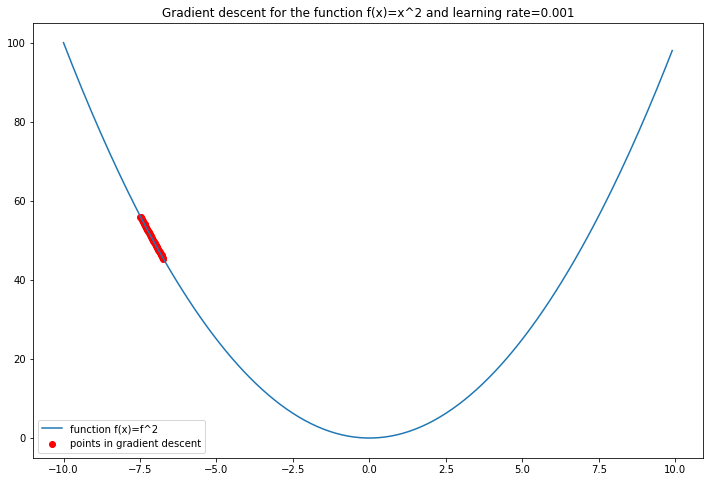

In [5]:
# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)

plt.figure(1,figsize=(12,8))
t = np.arange(-10, 10, 0.1)
t2=t**2
plt.plot(t,t2,label="function f(x)=f^2")
plt.scatter(X,Y,color="r",label="points in gradient descent")
plt.title("Gradient descent for the function f(x)=x^2 and learning rate=0.001")

plt.legend()
plt.show()

##### As we can observe from the plot, the learning rate seems to be too small as the gradient descent moves very little in 50 iterations and we can't find the minimum.

### Exercise 4: Low learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=0.05$. What do you observe? Is this a good learning rate?

### Solution 4

In [6]:

# Run gradient descent, get gradient descent trajectory x and y
X,Y=gradient_descent(f, df, -7.5, 0.05, 50, -7.5)

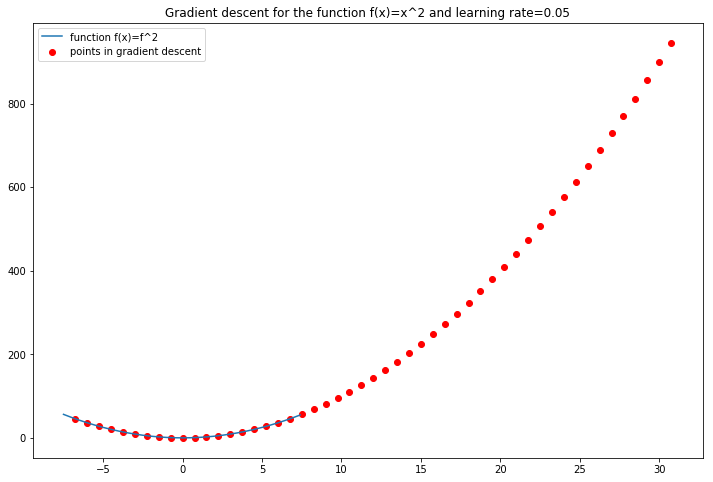

In [7]:
# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)

plt.figure(1, figsize=(12,8))
t = np.arange(-7.5, 7.5, 0.1)
t2 = t ** 2
plt.plot(t, t2,label="function f(x)=f^2")
plt.scatter(X, Y, color="r", label="points in gradient descent")
plt.title("Gradient descent for the function f(x)=x^2 and learning rate=0.05")

plt.legend()
plt.show()

The learning rate seems already too big. The gradient descent in fact jumps directly beyond the optimum.

### Exercise 5: High learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=0.99$ What do you observe? Is this a good learning rate?

### Solution 5

In [8]:
# Run gradient descent, get gradient descent trajectory x and y
X,Y = gradient_descent(f, df, -7.5, 0.99, 50, -7.5)


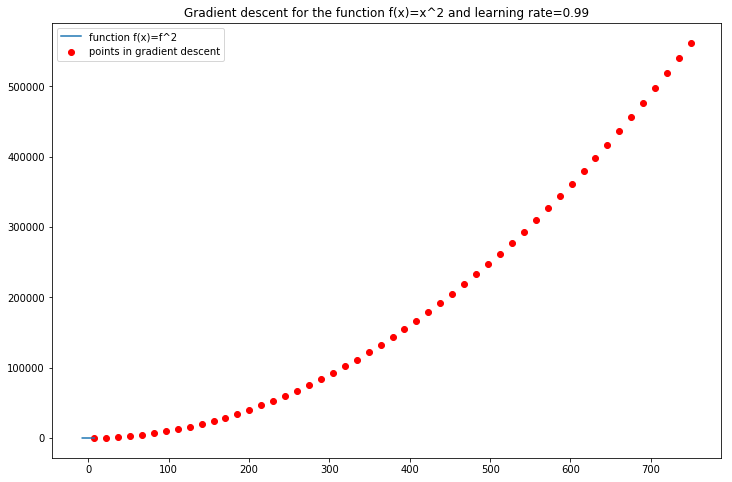

In [9]:
# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)

plt.figure(1,figsize=(12,8))
t = np.arange(-7.5, 7.5,0.1)
t2=t**2
plt.plot(t,t2,label="function f(x)=f^2")
plt.scatter(X,Y,color="r",label="points in gradient descent")
plt.title("Gradient descent for the function f(x)=x^2 and learning rate=0.99")

plt.legend()
plt.show()

The learning rate is absolutely huge and the gradient descent ,already for the first iteration , jumps beyond the optimum

### Exercise 6: Very high learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=1.01$. What do you observe? Is this a good learning rate?

### Solution 6

In [10]:
# Run gradient descent, get gradient descent trajectory x and y
X,Y = gradient_descent(f, df, -7.5, 1.01, 50, -7.5)


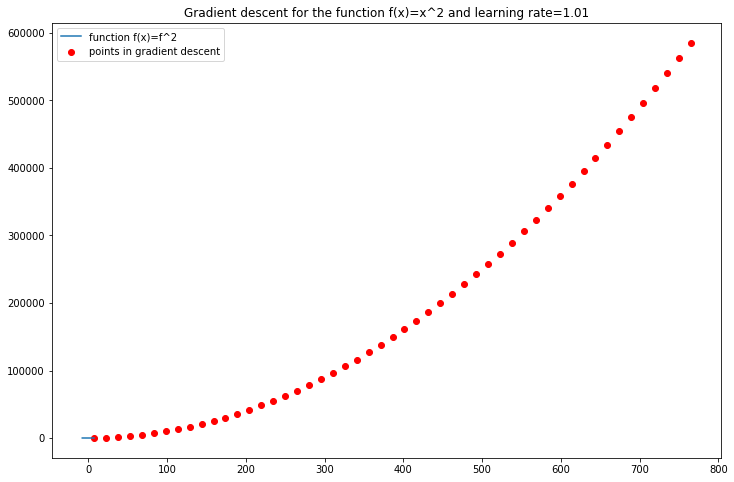

In [11]:
# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)

plt.figure(1,figsize=(12,8))
t = np.arange(-7.5, 7.5,0.1)
t2=t**2
plt.plot(t,t2,label="function f(x)=f^2")
plt.scatter(X,Y,color="r",label="points in gradient descent")
plt.title("Gradient descent for the function f(x)=x^2 and learning rate=1.01")

plt.legend()
plt.show()

As before, the learning rate is huge,therefore we jumps beyond the optimum even at the first iteration

### Exercise 7: Cross-entropy loss (1 point)
The cross-entropy loss is a common loss function used for classification, and is given by:
$$L = \frac{1}{N} \sum^N - t^{(n)}\log(y^{(n)}) - (1 - t^{(n)})\log(1 - y^{(n)})$$
Here, $t^{(n)}$ is the target (real value) which is either 0 or 1, and $y^{(n)}$ the prediction of the $n$th example is a continues value between 0 and 1 (output of a sigmoid activation).

The cross-entropy loss is low (towards zero) when the MLP is precisely right (true negatives, true positives). It is high (towards infinity) when the MLP is all wrong (false negatives, false positives). Read and understand the function to verify that this is indeed the case (i.e., what happens when $y\neq t$ and when $y=t$). 

We need the derivative of the cross-entropy loss function with respect to $y$ to do gradient descent (i.e., backpropagation) to tweak the parameters (i.e., the weights) for classification. Derive the cross-entropy loss function with respect to $y$, i.e. derive $\frac{\partial L}{\partial y}$. You can ignore the sum over the batch; use: $L = -t \log(y) - (1 - t)\log(1 - y)$. Simplify the derivation as much as possible (i.e. to one fraction of two terms). 

### Solution 7:
$=-t\cdot{\tfrac{\mathrm{d}}{\mathrm{d}y}\left[\log\left(y\right)\right]}+\left(t-1\right)\cdot{\tfrac{\mathrm{d}}{\mathrm{d}y}\left[\log\left(1-y\right)\right]}$

$=-{\dfrac{t}{y}}+\dfrac{1}{1-y}\cdot{\tfrac{\mathrm{d}}{\mathrm{d}y}\left[1-y\right]}\cdot \left(t-1\right)$


$=\dfrac{\left({-{1}}\right)\left(t-1\right)}{1-y}-\dfrac{t}{y} $

$=-\dfrac{y-t}{\left(y-1\right)y}$

### Exercise 8: The sigmoid activation function (1 point)
The sigmoid activation function is an activation function that squeezes its input into the range of 0 and 1. This is convenient, especially as $y$ at the output, and also somewhat interpretable as a probability for a certain class. The sigmoid is given by:

$$f(a) = \frac{1}{1+\exp(-a)}$$

Derive the derivative of the sigmoid activation function with respect to the activation $a$, and show that the derivative is equal to a combination of two sigmoids: 

$$\frac{\partial f(a)}{\partial a} = \frac{\partial y}{\partial a} = f(a)(1 - f(a))$$

This simple derivative is another convenient property of the sigmoid activation function.

### Solution 8

For the quotient rule: $$ \frac{\mathrm{d}}{\mathrm{d}a}\:\:\frac{1}{1+\exp(-a)}$$

$$= \frac{\frac{\mathrm{d}}{\mathrm{d}a}{1} \cdot{(1+\exp(-a))} - 
\frac{\mathrm{d}}{\mathrm{d}a}(1+\exp(a))\cdot1}{(1+\exp(-a))^{2}} $$

$$= \frac{0 \cdot (1+\exp(-a)) - 0+\exp(-a)\cdot\frac{\mathrm{d}}{\mathrm{d}a}{-a}\cdot1}{(1+\exp(-a))^{2}}$$

$$= \frac{0 \cdot (1+\exp(-a)) - 0+\exp(-a)\cdot-1\cdot1}{(1+\exp(-a))^{2}}$$

$$= \frac{\exp(-a)}{(1+\exp(-a))^2}$$

Then we add and subctract 1 and simplify from here:

$$ = \frac{1 - 1 + \exp(-a)}{1+\exp(-a)^2}$$

$$=\frac{1 + \exp(-a)}{1+\exp(-a)^2}-\frac{1}{1+\exp(-a)^2}$$

$$=\frac{1}{1+\exp(-a)}-\frac{1}{1+\exp(-a)^2}$$

$$=\frac{1}{1+\exp(-a)}\cdot\left( 1-\frac{1}{1+\exp(-a)}\right)$$

As we see the result is :
$$sigmoid \cdot (1 - sigmoid)$$

### Exercise 9: The forward pass (0.5 points)
We are going to build a one-layer network to classify digits. The inputs $x$ are images of handwritten digits. Here, we restrict the problem to binary classification, so we classify only two possible digits (0 and 1). This means that we need only one a single output unit $y$. 

In the forward pass the input $x$ is weighted by one layer of weights $w$. Then this activation $a$ is passed on into the sigmoid unit activation function, producing $y$. 

Write down the equations for the activation $a$ and the output $y$.

### Solution 9:

\begin{eqnarray*}
a &=(w^Tx)&  \\
y &=\sigma(a)&  \\
\end{eqnarray*}

### Exercise 10: The backward pass (1 point)

To update the weights so that the loss is further reduced (i.e. to gradually let the network learn to do the right thing), we need the partial derivatives of the weights. To compute the partial derivatives of the weights $w$, we have to propagate from the error function back through the activation function to the weights. Note that we do not have to handle any hidden units and their activations in this one-layer network. 

Obtain $\frac{\partial L}{\partial w}$ by applying the chain rule multiple times. Note that $L$ is the cross-entropy loss, that you have already derived $\frac{\partial L}{\partial y}$ and $\frac{\partial y}{\partial a}$ further above, and that $\frac{\partial a}{\partial w}$ has a trivial derivative. Simplify $\frac{\partial L}{\partial w}$ as much as possible.


### Solution 10:



$$\frac{\partial L}{\partial w}=\frac{\partial L}{\partial a}\:\:\frac{\partial a}{\partial w}$$

and as : $$\frac{\partial L}{\partial a}=\frac{\partial L}{\partial y}\:\:\frac{\partial y}{\partial a}$$

therefore:$$ \frac{\partial L}{\partial w}=\frac{\partial L}{\partial y}\:\:\frac{\partial y}{\partial a}\:\:\frac{\partial a}{\partial w}$$


putting all together:$$ =-\dfrac{y-t}{\left(y-1\right)y}\:\:\frac{1}{1+\exp(-a)}\cdot\left( 1-\frac{1}{1+\exp(-a)}\right)\:\:x$$

since $$\frac{1}{1+\exp(-a)}=y$$

therefore $$=-\dfrac{y-t}{\left(y-1\right)y}\:\cdot\:y\left( 1-y\right)\:\cdot\:x$$

$$=\dfrac{-y+t}{\left(-y+1\right)y}\:\cdot\:y\left( 1-y\right)\:\cdot\:x$$

$$=(t-y)\:\cdot\:x$$

### Exercise 11: Implementation (2.25 points)
Now that all the math is done, we can start implementing the one-layer network for binary classification of two digits, where we make use of sigmoid units and the cross-entropy loss. Write the following functions:
1. `cross_entropy(Y, T)`: Computes the cross entropy loss. Make sure that there are no exact-zero inputs for `np.log()` (something simple like adding a very small number if `Y` is 0 is fine). 
1. `sigmoid(A)`: Passes the activity `A` through the sigmoid activation function.
1. `linear(X, W)`: Computes the activities `A` as `X` weighted by `W`.
1. `forward(X, W)`: Computes the forward pass for the one-layer network with a sigmoid output unit. Returns `Y`. 
1. `backward(X, Y, T)`: Computes the backward pass for the one-layer network with a sigmoid output unit and cross-entropy loss.
1. `train_network(X_train, T_train, X_val, T_val, n_epochs, eta)`: Implement the training procedure (learn the weights). See the skeleton code for some help.
1. `test_network(X, W)`: Predicts new examples given as `X`, returns classes as a binary label vector (for classes 0 and 1). Interpret the output of the network (the sigmoid) as a probability for class 1 and transform these probabilities to this binary label vector.

### Solution 11

In [12]:
def cross_entropy(Y, T):
    """
    Computes the cross-entropy loss.
    INPUT:
        Y = [1 N] output vector for N examples
        T = [1 N] tagret vector for N examples
    OUTPUTS
        L = [1 1] the mean cross-entropy loss
    """
    def nonzero(a):
        if a == 0:
            a = 0.00000000001
        return a
    nonzero = np.vectorize(nonzero)
    Y = nonzero(Y)
    """
    log = np.log
    N = len(T)
    x = ((1-t) * log(1-y) for y,t in zip(Y,T))
    y = (-t * log(y) for y,t in zip(Y,T))
    L = 1/N * np.sum(e-l for e,l in zip(x,y))
    """
    N = len(T)
    L = -T * np.log(Y) - (1-T) * np.log(1-Y)
    #print 1, L
    L = np.sum(L)
    L = L/N
    #print N,T.shape
    return L
    """
    L=[]
    for i in range(0,len(Y)):
        y=Y[i]
        if y==0:
            y=y+0.0001
        L.append(np.multiply(T[i], np.log(y)) + np.multiply((1-T[i]), np.log(1-y)))
    
    L= -(np.sum(L)/len(Y))
    """
    return L

In [45]:
def sigmoid(A):
    """
    Computes the sigmoid activation function.
    INPUT:
        A = [K N] activity matrix of K units for N examples
    OUTPUT
        Y = [K N] output matrix of K units for N examples
    """
    def sigmoid_single(a):
        return 1/(1+np.exp(a))
    f = np.vectorize(sigmoid_single)
    Y = f(A)
    """
    Y=[]

    for i in xrange (len(A)):
        K=[]
        for x in range(len(A[i])):
            y=1/(1+np.exp(-A[i,x]))
            K.append(y)
        Y.append(K)
    """
    return Y

In [46]:
def linear(X, W):
    """
    Computes the activities for a fully connected layer.
    INPUT:
        X = [P N] data matrix of P input units for N examples
        W = [Q P] weight matrix of P inputs to Q outputs
    OUTPUT
        A = [Q N] activity matrix of Q output units for N examples
    """
    
    A = np.dot(W, X)
    
    return A

In [47]:
def forward(X, W):
    """
    Computes the forward pass for a one-layer network with sigmoid units.
    INPUT
        X = [P N] data matrix of P inputs for N examples
        W = [1 P] weight matrix of the first layer of P inputs to 1 output
    OUTPUT
        Y = [1 N] output vector for N examples
    """
    
    A = linear(X,W)
    Y = sigmoid(A)
    
    return Y

In [48]:
def backward(X, Y, T):
    """
    Computes the backward pass for a one-layer network with sigmoid units and cross-entropy loss.
    INPUT:
        X  = [P N] data matrix of P inputs for N examples
        Y  = [1 N] a vector of predictions for N examples
        T  = [1 N] a vector of targets for N examples
    OUTPUT
        dW = [1 P] gradient matrix for the weights of P inputs to 1 output
    """
   
   
    dW = np.dot((T-Y), X.T)
    
    return dW

In [49]:
def train_network(X_train, T_train, X_val, T_val,n_epochs=100, eta=0.001):
    """
    Performs the training procedure for a one-layer network with sigmoid units and cross-entropy loss.
    INPUT:
        X_train  = [P N] data matrix of P inputs for N training examples
        T_train  = [1 N] a vector of targets for N training examples 
                   (labels for digits 0 or 1; given as numbers 0 or 1)
        X_val    = [P M] data matrix of P inputs for N training examples
        T_val    = [1 M] a vector of targets for N training examples
        n_epochs = [1 1] number of training epochs (default 100)
        eta      = [1 1] learning rate (default 0.001)
    OUTPUT:
        W          = [1 P] the learned weights of P inputs to 1 outputs
        train_loss = [Z 1] the training loss for Z epochs
        val_loss   = [Z 1] the validation loss for Z epochs
    """
    
    # Weight initialization
    W = np.random.randn(1, X_val.shape[0])
    
    # Arrays for saving losses
    train_loss = np.zeros((n_epochs))
    val_loss = np.zeros((n_epochs))

    # Loop over epochs
    for i_epoch in xrange(n_epochs):
        
        # Forward pass for current network (i.e. with current W)
        # (obtaining Y_train)
        Y_train = forward(X_train, W)
        
        # Backward pass
        # (obtaining dW)
        dW = backward(X_train, Y_train , T_train)
        
        # Parameter update
        # (adjusting W with given learning rate)

        W = dW * W
        
        # Save losses for train and validation set (compute with cross entropy loss function)
        train_loss[i_epoch] = cross_entropy(Y_train, T_train)
        # Print progress and loss
        if i_epoch % 10 == 0:
            print("Epoch {}/{}. Train loss: {}. Validation loss: {}.".format(
                1+i_epoch, n_epochs, train_loss[i_epoch], val_loss[i_epoch]))
        
    return W, train_loss, val_loss

In [50]:
def test_network(X, W):
    """
    Applies the trained one-layer network with sigmoid units to classify data.
    INPUT:
        X = [P N] data matrix of P inputs for N examples
        W = [1 P] weight matrix of P inputs to 1 output
    OUTPUT
        Y = [1 N] output vector (i.e., predicted labels) for N examples
    """
    Y = forward(X, W)
    return Y

### Exercise 12: Training (1 point)
Now that we have done all the work, we can finally run the network. Below we first load in the digit dataset, and restrict it to two digits. We split this data into a training and a test set. 

Train your network on the training dataset `X_train` and `T_train`, and validate it at each epoch on the test set `X_val` and `T_val`. After training, plot the train and validation losses over epochs (as returned by `train_network()`.

In [51]:
# Read full dataset from mat file
mat = sio.loadmat("digits.mat")
X = mat["digits"]
T = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]).repeat(1000)
sz = (28, 28)

In [52]:
# Select only digits 0 and 1 for binary classification
digits = np.array([0, 1])
idx = np.in1d(T, digits)
X = X[:, idx]
T = np.array([0, 1]).repeat(1000)  # class labels given as 0 and 1 then

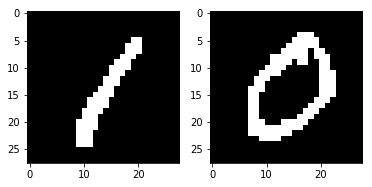

In [53]:
# Plot an example of both classes
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X[:, 0].reshape(sz).T, cmap="gray")
ax[1].imshow(X[:, 1000].reshape(sz).T, cmap="gray")

In [54]:
# Split dataset in training, validation, and testing split
X_train, X_test, T_train, T_test = train_test_split(X.T, T, test_size=0.2)
X_train, X_val, T_train, T_val = train_test_split(X_train, T_train, test_size=0.2)

# Transpose back
X_train = X_train.T
X_val = X_val.T
X_test = X_test.T

T_train = T_train.reshape((1, T_train.size))
T_val = T_val.reshape((1, T_val.size))
T_test = T_test.reshape((1, T_test.size))


# Print dimensions
print("Dimensions training inputs: {}, and training outputs: {}".format(X_train.shape, T_train.shape))
print("Dimensions validation inputs: {}, and validation outputs: {}".format(X_val.shape, T_val.shape))
print("Dimensions testing inputs: {}, and testing outputs: {}".format(X_test.shape, T_test.shape))

Dimensions training inputs: (784, 1280), and training outputs: (1, 1280)
Dimensions validation inputs: (784, 320), and validation outputs: (1, 320)
Dimensions testing inputs: (784, 400), and testing outputs: (1, 400)


### Solution 12

-13.6744649342
-13.6744649342
-16.1524945439
-24.6869338456
-10.4138131761
-18.4120989501
-5.95009292605
-14.549953612
-12.7751437681
-8.10146024083
-6.13412089595
-21.4848457006
-17.0854377513
-14.4708341679
-16.0273522088
-10.2768472091
-11.9881604502
-18.4861486403
-19.7017867956
-20.0116261924
4.36983305495
-19.9499582048
-15.4044156973
-8.72555822482
-6.6989224938
-8.84771865133
-19.920311864
-15.2290517842
-10.9561587976
-16.3070050321
-10.9149783096
-13.9573717815
-18.3370835285
-5.19701069886
-12.4791691582
-14.2845572587
-4.20422509263
8.05469302695
-11.0238401433
-8.38410612246
-13.063783515
-28.0671822992
-0.543749001285
-12.4469542145
-7.08452675093
-17.1341341511
-20.116076214
-8.72643018104
-3.54555242486
-7.16446797775
-10.4372251898
-12.199455246
-19.6777530011
-7.27235964208
-10.0623798674
-0.951506179883
-14.879002056
-19.2401343755
-5.98381955533
-4.60852075059
-13.6621782484
-12.6654556737
-14.0427744023
-7.46382496547
-8.78534025665
-1.38042485512
-17.1241412147
-1

2.58895771976
-11.3487674479
-0.521780273146
-19.6853391725
-12.6742354545
-20.2249233385
-13.3074713614
-19.1179411908
-9.98243719911
-15.7143781374
-15.8954310017
-4.56075901363
-16.4326101688
-1.24214940522
-22.5835268859
-11.1216416175
-6.55142494049
-9.21158627453
-6.8965228659
2.21585783785
-9.67648306281
-16.4246650401
-12.6771945353
-24.2306142561
-3.56517579124
-14.9239257785
-18.8139175896
-14.2507401352
-10.6696069298
-1.1162456216
-4.14891350686
-4.5490678504
-7.32376005828
-14.8587089524
-9.80498668905
-16.5631346716
-16.390879917
-16.5521360843
-2.05370047216
-12.8747810462
-12.1419863746
-21.9330527132
-25.2925834884
-10.0624158502
-15.6609441931
-19.0351640254
-17.1542072115
-15.1038344484
-21.6711966269
-11.7360781649
-5.90263564088
-20.9320005569
-10.6773553609
-12.5243804505
-1.34121703488
-10.6086838576
-20.5749279142
-5.24982815302
-23.8626906203
-12.1598337235
-21.5779249969
-10.799990451
-10.6835265569
0.671062251675
0.354150732382
-0.658111401876
5.76938917068
-

3114.57704381
5057.38671642
1311.11888007
5168.51548684
-57.1628001829
4848.9789148
1653.17448089
1600.40529504
3729.01064778
5796.90405966
6989.80322369
3134.10581441
3637.5289225
1024.9512511
2394.25718846
1848.9006449
4748.17068077
3574.02260606
4087.53099502
4878.48092426
1238.89765332
3204.09166822
4281.92804875
3682.20496129
3351.06469752
3991.58106634
1038.90151301
4540.28890758
5695.26718474
2275.42020733
856.009225748
1286.13041417
6327.27029504
3785.11535003
6538.73297443
539.454286339
3996.35706245
1270.39061994
3736.00162571
4683.76040658
1567.80041081
2814.48372519
5721.01194769
137.309730816
2436.4951173
4154.00466561
1352.51999651
3851.00470964
1928.40531754
3856.05278811
2352.85388442
2967.92134246
2689.09749724
3718.55277445
3158.8462834
1643.76353685
3678.13153517
6790.18095724
3164.60611167
4487.27652786
-97.1242530829
5685.05020411
4871.61158839
2338.05189266
2545.95134874
3161.91431125
1651.73860155
1283.51522894
2960.56124035
3117.6272835
3303.57324959
3642.526526

/home/mattijn/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


736.322685968
1580.57589027
3297.60770758
4299.7597266
3268.99949819
3994.91551445
2166.29564879
5360.37942728
5623.31410984
1994.38579175
1341.7561938
-604.371260268
2849.38570305
5327.26941993
4872.8465823
323.939930478
2395.92485716
3827.19223936
4386.32384209
3663.84137342
2463.28385432
2902.06028595
1436.78084924
4066.28560609
5453.49687864
5537.62830111
3553.44894458
2911.04042369
-492.547854994
2307.77183682
5713.72595801
1883.17173565
2133.66357135
4129.36395355
2637.67145269
3844.34049304
3976.46280792
3852.40400936
3324.86384286
3400.47641393
4306.30952437
3437.58783481
6769.03887525
6162.80195881
5706.45857222
3448.02709112
-169.686035643
4242.69516915
4868.58921272
2813.71610454
2110.76578869
520.943643489
3959.44033937
1199.82439559
3395.1582132
4471.37481155
3953.64403417
3992.00161686
4364.10908425
2500.74235867
5031.46476138
3071.92544432
4202.02821759
2522.3854201
6331.43077773
3352.31121448
3966.02219615
1767.96514924
1911.83198348
3516.01130544
2554.57166907
3859.872

496715.770864
1318073.21611
1444548.53643
888524.443924
1016556.54982
1302482.54764
-140258.761261
1577574.14525
721269.684072
657094.894188
1162731.02669
717261.21226
481323.357123
1336622.44045
1498947.89075
1034652.06529
836187.962553
1455587.33284
1552191.87847
241203.845543
1073041.44804
1437494.77015
384470.132505
1341090.26877
1076697.17299
633004.603916
605231.382592
923120.808383
1264179.60957
1592253.84464
933704.955462
1533023.54931
1284720.69262
1003624.92233
1331656.51118
727795.562168
324270.251348
1315644.67144
684079.611025
1708875.00117
1237635.97343
1237807.55964
1587484.85351
1181862.06598
205244.760039
541593.832437
861082.940379
1001185.8938
991777.600214
522590.406056
1330010.76377
989032.127806
840590.394487
609982.393386
1595059.41928
1285556.81076
614595.757455
1131299.14797
1354892.06618
1133935.98617
582118.825589
922976.839323
1461267.07271
1023771.59743
1217108.0816
720669.477361
1667029.60266
1218105.71319
1031145.0194
-300991.083246
1139663.54369
1418435.

159410737.128
445986236.822
650285293.235
497596670.973
500268908.284
691177900.37
227342061.553
639320460.846
50186677.3317
339483380.232
646899105.1
426295411.639
710548966.704
408459982.822
193172488.973
212877158.314
705748670.413
463033859.181
24996620.3354
-50173478.6084
537784431.569
314832484.207
105548017.901
43711581.2473
-1081559.07766
114387084.108
416412923.522
762736020.259
566597227.877
686851502.406
147742428.912
707617021.054
219828445.142
271018258.072
627797117.889
638237077.942
-147613316.131
576768206.814
351232260.252
445476481.351
578558473.711
62916408.1395
551082460.159
242240994.263
121734007.62
-110134896.645
115259614.511
655308233.168
208067001.508
497192500.169
353286993.329
356711810.183
289748375.766
657116460.186
-11665043.4524
718352139.702
648969216.911
569937713.327
384057235.336
32762451.005
136281318.049
713744.596395
145198656.316
271522885.516
248729301.84
544084466.088
650208249.314
98882908.251
395057271.25
607712863.942
51900843.2697
280185970

6216532309.9
72734296522.4
3.06253598862e+11
97760806372.9
2.52505224208e+11
2.3089806192e+11
1.55512948606e+11
1.62934073305e+11
70548838571.1
2.55548145803e+11
3.31621626003e+11
1.95726643937e+11
3.06209768912e+11
2.91936899767e+11
2.06341352452e+11
1.54297686235e+11
1.67554584272e+11
1.05330941597e+11
1.21987529134e+11
1.3853315389e+11
2.893148704e+11
3.18313956221e+11
10284879528.5
2.52996455307e+11
1.98266350346e+11
2.95122920437e+11
2.69600366607e+11
2.77869634766e+11
97899734285.6
87127424675.4
1.30424081294e+11
2.64050650013e+11
84928314512.4
1.40646073106e+11
1.36666551565e+11
82813739325.2
1.53928768017e+11
3.23731131848e+11
68296904990.1
911398094.09
2.90233819064e+11
1.74797354621e+11
52633719524.9
1.99982396812e+11
2.52672332749e+11
1.0094146188e+11
71527172526.7
3.2899809183e+11
1.28347699453e+11
1.93243893152e+11
96212381861.6
3.13531904274e+11
42356540004.8
1.31257440677e+11
2.47593077119e+11
52382581187.2
1.45341099189e+11
72800779055.4
3.32692424781e+11
2.66784630862e

1.45173784462e+14
1.08299005643e+14
2.66220294817e+13
2.77251415654e+13
1.64307160061e+13
1.00961871537e+14
2.67961252437e+13
5.97375355401e+13
3.55254409823e+13
1.15861510049e+14
1.31009560156e+14
8.87150115318e+12
1.34760578066e+14
1.58854227243e+14
9.52705292997e+12
1.26621639941e+14
1.64541619654e+14
3.12741954867e+13
5.38060967962e+13
1.6464719488e+14
-1.24374000411e+13
8.58835957841e+13
5.79430572226e+13
5.14731495951e+13
1.05203234185e+14
3.33331741786e+13
9.15103980269e+13
1.10845655902e+14
1.37130001049e+14
1.64873964901e+13
4.00440553483e+13
6.96395544119e+13
1.41730649497e+14
1.45998291526e+14
6.84599599958e+13
1.48640156074e+14
4.87324563416e+13
1.10994533875e+14
1.4272850838e+14
4.42852991037e+13
6.60741667899e+13
1.25668158265e+14
3.40458582014e+13
6.86013984948e+13
7.85792142764e+13
9.75131758974e+13
5.11154632686e+13
1.24612945181e+14
1.00242601545e+14
1.14464592418e+14
1.22075287352e+14
1.34477699124e+14
5.23951224101e+13
1.39851733813e+14
6.94146537088e+13
1.006646045

1.16795244492e+16
5.1634637166e+16
2.09130815597e+16
5.83558586541e+16
7.37417939954e+16
7.02987835201e+16
2.60587134007e+16
3.83179557748e+16
7.45888545861e+16
2.69877238097e+16
1.14552675466e+16
4.52049427161e+16
5.93880879961e+16
1.26557337079e+16
2.3987897581e+16
1.14628124771e+16
3.08971248466e+16
6.54058653088e+16
4.00100600665e+16
3.4348144187e+16
5.43804166499e+16
5.97179576278e+15
3.20077974101e+16
5.12722317142e+16
6.78606702953e+16
3.61370740083e+16
-6.71814855971e+15
4.16173004764e+16
7.50231050638e+15
6.66076169617e+16
4.50542980792e+16
5.87782007969e+16
2.69715056462e+16
1.6488797562e+16
6.60401905202e+16
5.96690167266e+16
6.70360648777e+16
5.68009614085e+16
5.72976980325e+16
4.37992852122e+16
6.75463639149e+16
6.03453549371e+16
2.69956706092e+16
6.54665352175e+16
1.56505669596e+16
3.72623912708e+16
4.51617818542e+16
6.64437575079e+16
8.57529062148e+15
3.23738123569e+16
1.62853720531e+16
1.48962432103e+16
2.6156837701e+16
-6.95303203879e+15
2.44259383006e+16
6.57227215393

1.62360794083e+22
5.86869666975e+21
1.65024190811e+22
1.3028750522e+22
9.90369805098e+21
1.19847108584e+22
6.51750810843e+21
1.49584263568e+22
1.56560067596e+22
1.63936424442e+22
1.46476827054e+22
8.12570980684e+21
6.59448483895e+21
2.99436199345e+21
5.92459050995e+21
1.10710483575e+22
1.02324270822e+22
5.35715974242e+20
1.15701999955e+22
-2.8168492297e+20
3.67424375337e+18
2.23699305731e+21
5.76056843076e+20
1.16058172338e+22
9.07718262523e+21
1.24084800173e+22
1.30054291901e+22
1.73104048545e+22
1.52019902394e+22
1.61774010828e+21
7.12439225957e+21
1.04032525124e+22
3.95119834916e+21
5.90263147918e+21
1.88790175172e+22
8.33119356449e+21
9.11410120061e+21
1.7252592371e+22
3.7017906225e+21
1.51553156798e+22
1.50426508541e+22
1.82087345869e+22
1.66175746015e+22
4.02685474888e+21
2.37162447906e+21
1.67875922127e+22
2.32654394296e+21
1.54953985515e+22
1.27408099021e+22
7.03350940791e+21
4.28430664474e+21
1.67257759232e+22
1.05941245889e+22
1.48553349713e+22
9.29043943597e+21
1.61594776664

4.63348325555e+24
4.33700148071e+24
4.94746253136e+23
6.84110348351e+24
1.34389736309e+24
4.02404114732e+24
7.89203761309e+24
7.70370037137e+24
2.01125162238e+24
6.13581814959e+24
8.10706502862e+24
3.60530989267e+24
7.26021835127e+24
8.22453120835e+24
4.35149455819e+24
6.59440506245e+24
2.06253547179e+22
8.06110977498e+23
2.876557358e+24
3.1633475233e+24
6.75015847113e+24
6.41770747091e+24
4.23774410459e+23
5.56617766412e+24
3.92785092511e+24
7.80048275633e+24
3.34659515642e+24
3.54776518962e+24
1.76343091556e+24
2.28041635597e+24
6.2626057466e+24
7.11973683505e+24
8.87458568169e+24
7.50108084608e+24
5.41764619805e+24
8.14529357177e+24
1.68476642169e+24
8.17371582898e+24
5.70461302937e+24
8.75530698722e+23
4.00347868111e+24
5.21647241149e+24
4.58314025116e+24
6.40072809813e+24
6.58256612381e+24
3.38201595079e+24
2.01472667e+24
-7.52821958125e+23
1.76540563378e+24
1.99662900115e+24
1.9291382069e+24
8.25834849217e+24
7.55909722084e+24
7.53460145391e+24
8.51498252761e+24
9.32294543033e+24

3.88914515725e+27
3.9882698083e+27
1.73323804841e+26
9.94324634046e+26
1.23161750688e+27
9.37599718429e+26
2.43126264848e+27
2.06088673447e+27
1.15846477508e+27
3.74147732948e+27
8.14291669838e+26
9.28512718359e+26
5.08385716019e+27
2.52745483984e+27
3.27693974233e+27
7.97622341392e+26
1.02829640814e+27
8.93640045746e+26
2.95883211243e+27
1.2958049345e+27
4.00396015702e+27
3.51238173865e+27
1.84505699845e+27
4.05257583621e+27
2.16109254248e+27
2.57320445599e+26
5.74290178116e+26
4.91213496781e+26
1.00527003201e+27
4.07867580419e+27
1.42831935118e+27
3.83543950606e+27
3.39509179441e+27
1.90567616836e+27
1.4102640851e+27
4.58641947511e+27
4.27898631741e+27
4.05184552439e+27
2.07662262578e+27
8.61319515737e+26
2.72425158337e+27
3.49069828858e+27
2.34331548602e+27
-3.60826040686e+25
1.17592995986e+27
3.36984713745e+27
3.01067151978e+27
1.2425019365e+26
2.98319787689e+27
1.65221668321e+27
2.7361496516e+27
3.42804737315e+27
6.1951523514e+26
4.31073139615e+27
8.03134301409e+26
2.02829563779e+

1.81652944355e+30
2.62121702376e+29
1.99939202668e+30
2.01591863028e+30
1.43144486897e+29
1.37223548758e+30
2.02464468739e+30
8.80559714104e+27
1.16853156406e+30
2.13746462789e+30
1.58785039725e+29
1.6574777534e+30
1.30978526315e+30
5.09746186348e+29
1.95574031013e+30
-8.01683258983e+28
1.70120871751e+30
6.36217584171e+29
1.9177432779e+30
2.03313422289e+30
1.18742633481e+30
7.41331811067e+29
5.80511556957e+29
1.34170371423e+30
1.24422654649e+30
5.44171652412e+29
1.52142494832e+30
1.97994989209e+30
1.96279425471e+30
8.36738494145e+29
2.01472993855e+30
6.0987515624e+29
2.00797161581e+30
4.83754121289e+29
1.70106070743e+30
2.16885338693e+30
5.09273429221e+29
1.95643715461e+30
1.28633358688e+30
1.85427773578e+30
5.42622473959e+29
4.25869659941e+29
1.92467332621e+30
8.05177614611e+29
2.07330648246e+30
1.0949809479e+30
6.18235749286e+29
5.9212508712e+29
1.48448613257e+30
2.06160403773e+30
2.09811582615e+29
9.29183759377e+29
2.58700107137e+29
4.61310924927e+29
4.28938633129e+29
8.45214640767e

8.06941949079e+32
8.70427040914e+32
1.06531927295e+33
9.51471195182e+32
6.74728083006e+32
1.01250736092e+33
1.87403895921e+32
1.01495694481e+33
7.19519051109e+32
9.877232191e+31
5.09361910671e+32
6.39432732089e+32
5.58008071787e+32
8.14391942164e+32
8.43079089983e+32
3.9696913528e+32
2.11505431675e+32
-8.83326680413e+31
2.01196121786e+32
2.60248134235e+32
2.39747114691e+32
1.00954252501e+33
9.69083502661e+32
9.44236288065e+32
1.02352037236e+33
1.16497080225e+33
4.13498913812e+31
7.18075542187e+32
8.87253208868e+31
1.00818118895e+33
1.11220392449e+33
9.73973623996e+32
7.8944384485e+32
5.12706976328e+32
1.00623135903e+33
7.0542525044e+32
5.45752254275e+32
1.0478287172e+33
4.894612134e+31
5.72065076521e+32
7.09632246971e+32
9.37379245913e+31
6.4562701431e+32
-1.68839342971e+32
1.12551822029e+32
7.91154020677e+32
9.90481271349e+32
9.96549618218e+32
3.83767436774e+31
2.26051596196e+32
3.19579491597e+32
2.56514771089e+32
6.10727779439e+32
5.40801214667e+32
2.74874414527e+32
9.42858498956e+32

5.35124830242e+35
-1.47305516042e+34
1.00190556246e+35
3.75603340205e+35
2.13368435957e+35
1.26549133254e+35
1.96237858844e+35
5.11927482964e+35
2.99074738383e+35
3.22188284448e+35
1.52883725393e+35
5.20401843232e+35
4.8224317826e+35
6.35490032786e+34
2.74413139227e+35
4.75418053459e+35
3.18912176574e+35
2.32209962329e+35
3.64461227213e+35
3.55011479449e+35
4.09489427102e+35
3.08681339307e+35
7.55148728132e+34
5.09756978482e+35
5.16418077472e+35
4.78523535754e+35
-2.54138663844e+34
4.14716746605e+35
4.96910748201e+35
1.46346404311e+35
4.4336246369e+35
5.00778541174e+35
4.36304105211e+35
5.68166427192e+35
-3.75761773555e+33
2.85620665576e+35
1.1163138333e+35
4.57698723492e+35
2.93680354252e+35
6.10219250835e+34
1.01463620029e+35
3.15629455201e+35
1.27426235182e+34
3.3425717008e+35
4.02977739827e+35
9.89611297238e+34
3.81077872956e+35
4.27810406061e+35
3.14681737991e+35
3.41724818264e+35
1.08487023313e+35
4.83149855993e+35
5.11913469457e+35
5.50053062485e+35
2.66606581526e+35
2.463154353

2.13547514117e+38
9.80985758114e+37
2.63557378421e+38
2.39127947041e+38
1.12456124146e+36
1.49515710296e+38
2.56268997739e+38
-4.19207548995e+35
2.51751398563e+38
2.18080583857e+38
6.61415173606e+37
1.42118466924e+38
2.50362528951e+38
2.53630079117e+38
2.43872306467e+38
1.69368619089e+38
2.31653424123e+38
1.41877709285e+38
1.41809415965e+38
2.50846407222e+38
1.40440610528e+38
4.40157760557e+37
2.23487826685e+38
1.13839412594e+38
2.5771520527e+38
1.44819989307e+38
1.78865660557e+38
2.62747868056e+38
2.70245353385e+38
-9.13080112746e+36
5.25165119752e+37
1.94313841931e+38
1.0789769383e+38
6.08723890395e+37
1.00038663287e+38
2.57200069051e+38
1.54943549473e+38
1.6628551913e+38
7.94922978285e+37
2.60235916383e+38
2.43466617907e+38
3.42521652712e+37
1.38583169958e+38
2.37523674795e+38
1.59438633739e+38
1.20917488741e+38
1.87464058901e+38
1.76424489061e+38
2.08019177864e+38
1.54954753672e+38
3.41061063437e+37
2.56177785569e+38
2.59324030968e+38
2.42643298768e+38
-1.09031134761e+37
2.06297051

2.76164295551e+40
1.00538355929e+41
5.47364063523e+40
2.93536333073e+40
5.10266183677e+40
1.2954492219e+41
8.03936956766e+40
8.59820302073e+40
4.1360271989e+40
1.30362033663e+41
1.23080305558e+41
1.85131724556e+40
7.01566517376e+40
1.18951052172e+41
7.98681374069e+40
6.30692305425e+40
9.64452734363e+40
8.79390493387e+40
1.05856557062e+41
7.7965774188e+40
1.52113940085e+40
1.29069437144e+41
1.30533728066e+41
1.23189543673e+41
-4.62652297977e+39
1.02953883698e+41
1.26851937835e+41
3.92732740517e+40
1.13543065017e+41
1.27317008994e+41
1.1157931646e+41
1.43813675351e+41
-2.06288910427e+39
7.25457381886e+40
2.81227662119e+40
1.18966622845e+41
7.86230986645e+40
1.35966778726e+40
2.7813021965e+40
7.90905364939e+40
3.40668371057e+39
8.89684784712e+40
1.01793907686e+41
2.35423672158e+40
9.93765173578e+40
1.09606531796e+41
7.89692749421e+40
8.64657798765e+40
2.89949032898e+40
1.22395966618e+41
1.29542997037e+41
1.37524861307e+41
6.73745738836e+40
6.24060746927e+40
1.28723498197e+41
5.62562495422

5.19051364334e+43
6.50994024949e+43
-1.29715978972e+42
-5.71889575214e+41
-5.61371981588e+42
1.27643859492e+43
3.25268037663e+43
4.76625072956e+43
2.67417476056e+43
6.43485813429e+43
2.15608424134e+43
5.65983074149e+43
7.68373052421e+43
4.91996863817e+43
4.02573451838e+43
6.50000660993e+43
2.44387609244e+43
6.46770749921e+43
5.20821417743e+42
2.56030365456e+43
6.6019075353e+43
5.92501635803e+43
6.50285370839e+43
5.02918678933e+43
2.87351696801e+43
1.24583231895e+43
6.53152602722e+43
6.23287132741e+43
1.72905124652e+43
-4.00533316211e+41
5.86126335436e+43
1.34478337285e+43
1.58104041023e+43
2.8100811787e+42
-2.02210627741e+42
9.15681870692e+42
5.39809712703e+43
7.20965864709e+43
6.38807670007e+43
6.59600912788e+43
1.01838633836e+43
6.51193925879e+43
2.12634901794e+43
1.46072259174e+43
6.45277214593e+43
6.18778822331e+43
-2.17003446039e+43
6.50659057903e+43
3.38227984269e+43
3.80452211058e+43
6.37855641378e+43
5.80531043962e+42
5.3871880057e+43
7.80297215243e+42
-1.74673662368e+41
-1.483

3.25703998825e+46
2.5681601646e+46
1.48289985685e+46
6.15049124181e+45
3.30554404327e+46
3.17143107284e+46
8.99467153067e+45
-3.66600272245e+44
2.98044671911e+46
6.56415715538e+45
8.40232200968e+45
1.39306373821e+45
-9.97058514363e+44
4.52958853584e+45
2.75437537383e+46
3.63329899456e+46
3.23786333616e+46
3.3325487905e+46
4.93309068475e+45
3.29632700709e+46
1.08684797732e+46
7.08299736238e+45
3.27248512443e+46
3.13201725956e+46
-1.10389293015e+46
3.29426414351e+46
1.72704918258e+46
1.87462136579e+46
3.2342866678e+46
2.97664361509e+45
2.71922341055e+46
3.45777652092e+45
-5.79187114273e+43
-7.45919189409e+45
2.56813263293e+45
3.12262047679e+46
6.05032462293e+45
3.28668681715e+46
1.41997848159e+46
2.35496655741e+46
1.34586764487e+46
3.14015651697e+46
2.78998555074e+44
3.45156091656e+46
3.5500051444e+46
3.532992768e+46
1.95323438701e+46
3.91326169987e+45
1.08290051584e+46
-1.80431128698e+45
1.10200327344e+46
1.49248346737e+46
1.47501210915e+46
3.11449876356e+46
3.07096606721e+46
1.04922931

1.42207212394e+49
7.57893628974e+48
1.67949523666e+49
8.4361316743e+48
1.13942655507e+49
1.69600021062e+49
1.77893593789e+49
-1.02965227042e+48
4.04263126542e+48
1.39299992749e+49
7.25425654353e+48
3.32407874799e+48
6.80844556196e+48
1.67754511534e+49
1.12856268865e+49
1.19760657364e+49
5.84260865415e+48
1.65711519695e+49
1.60399084867e+49
2.91591442678e+48
9.20865354075e+48
1.51400550903e+49
1.01487300333e+49
9.00482025981e+48
1.31776191548e+49
1.10573359528e+49
1.40837206065e+49
1.00501106661e+49
1.19852228236e+48
1.67297863912e+49
1.68667734301e+49
1.62455467598e+49
-3.11901402859e+47
1.30395909942e+49
1.65679872777e+49
5.35581924877e+48
1.4948737091e+49
1.65789545932e+49
1.46777528936e+49
1.87373137865e+49
-3.87028384013e+47
9.40508303378e+48
3.63149243893e+48
1.59768543409e+49
1.09627263205e+49
1.45451890361e+48
3.90019980571e+48
1.00547048314e+49
5.60081338786e+47
1.23629357002e+49
1.31298036697e+49
2.75205434791e+48
1.3412963565e+49
1.43942952463e+49
1.00491670762e+49
1.12149199

8.35891943412e+51
7.81616164668e+50
6.97484380984e+51
6.39628367966e+50
3.82582340039e+48
-1.90977382028e+51
6.38455024826e+50
8.05236723914e+51
1.46798593595e+51
8.52706840712e+51
3.71556758965e+51
6.28599380778e+51
3.53655533021e+51
8.09138704541e+51
6.23833798214e+49
8.84627926985e+51
9.1535638597e+51
9.09315738878e+51
5.22615933679e+51
1.09221555459e+51
2.82812301034e+51
-5.71928844595e+50
2.86204587886e+51
3.88172987868e+51
3.83982568992e+51
8.11271018895e+51
7.84216682066e+51
2.75907785327e+51
5.11521613903e+51
8.58779080785e+51
7.73802084756e+50
4.975144062e+51
8.84040110019e+51
3.77835356916e+51
2.8112823362e+51
5.42744901317e+51
4.61190876471e+51
2.21591011754e+51
6.84775291128e+51
8.39164679094e+51
9.45528138625e+51
7.09125374088e+51
8.47409658353e+51
3.50547665181e+51
8.18177992125e+51
1.47055915826e+51
2.47108665226e+51
7.81874599864e+51
2.01473658009e+51
8.50675863575e+51
5.93397373284e+51
1.17325434207e+51
-2.50096801038e+50
2.80527510148e+51
8.52475922617e+51
5.013085418

2.63336658755e+54
4.30012982502e+54
1.70412598096e+54
4.37715396966e+54
4.11411994736e+54
2.8789422354e+54
1.33955828066e+54
3.90000980535e+54
1.45604189707e+54
1.47435920216e+54
2.38261579222e+54
3.79856154556e+54
9.47165993161e+53
4.60242940902e+54
4.00930730135e+54
3.39486430758e+54
4.51506048611e+54
4.29754146891e+54
1.81816353598e+54
4.10145066581e+54
2.03555003384e+54
4.29465341923e+54
2.86887770618e+53
3.38278190669e+54
4.332127087e+54
5.97955910801e+53
2.6889423875e+54
4.37208208708e+54
2.01714196495e+53
3.55201885123e+54
2.62120931921e+53
8.17766261166e+53
4.32127183155e+54
3.39680054426e+53
4.32046694797e+54
3.45937711355e+54
-3.23331933693e+53
3.43670589902e+54
2.77241641654e+54
4.05815329407e+54
4.28607982274e+54
9.16538981749e+51
7.76076517545e+51
4.29340615953e+54
4.5878684427e+54
2.46586309394e+54
4.26229082268e+54
1.4713524642e+54
2.15447228812e+53
1.2652051163e+54
2.71453297705e+54
5.09304186106e+54
-1.35480241604e+52
3.45515670379e+54
2.09490187161e+54
9.88144492774e+

-8.06872690881e+55
1.86703973304e+57
2.26728915235e+57
1.17886090885e+57
3.60732264199e+56
2.5812837823e+56
3.43129101418e+56
1.09844813902e+57
1.34536304387e+56
1.12169539735e+57
2.92265712066e+56
1.56657976293e+57
1.7672890841e+57
3.87412597496e+56
2.26302131391e+57
2.23075412261e+57
4.82577618049e+56
2.17766679823e+57
2.23343244318e+57
1.98951982848e+56
1.53247772179e+57
2.62289744858e+57
3.99963751762e+56
7.99103864935e+56
1.03866294367e+57
1.08276207218e+57
1.01501591625e+57
6.92354577619e+56
1.80069577897e+57
1.77201313446e+57
2.19370624928e+57
6.59091414213e+56
2.82977528466e+56
1.2704591825e+57
1.7467313999e+57
2.20808369522e+57
1.36316890862e+57
2.19279895505e+57
8.56049642871e+56
2.25542709084e+57
2.08606759444e+57
1.51139886536e+57
6.50101934599e+56
1.98988363921e+57
7.43760347373e+56
7.18037292968e+56
1.21850980926e+57
1.95332168494e+57
4.55551553826e+56
2.36510988663e+57
2.05467412119e+57
1.74889453379e+57
2.30743218761e+57
2.20094334564e+57
9.38943269104e+56
2.09383995973

1.12617844398e+60
4.26155226901e+59
7.9116591318e+59
6.95397082873e+59
1.38679062638e+60
4.3973570131e+59
1.13119745285e+60
9.64929827351e+59
8.2939879952e+59
1.02569963952e+60
1.12223759869e+60
7.07202872234e+59
8.71925768134e+59
7.43559274048e+58
9.04586581488e+59
2.87395324628e+58
1.42573625811e+59
1.12174330015e+60
9.50334870186e+59
3.80024075762e+59
4.34087501119e+58
1.05347763145e+60
7.3796799608e+59
1.12389411348e+60
1.14523907989e+60
8.22684043015e+59
1.51556684011e+59
5.96528273987e+59
3.45914778598e+59
6.05802673233e+59
9.66252860352e+59
2.0072134194e+59
5.27537600997e+59
6.99134559384e+58
8.15616096065e+59
-4.93703919915e+57
1.20484380688e+60
4.79422440703e+59
3.39882902496e+59
9.45000325911e+59
1.53550969612e+59
8.72529877481e+59
1.12310954082e+60
1.08490377858e+60
2.46720232951e+59
2.11751292614e+59
1.13981261455e+60
4.55203669544e+59
1.02177028348e+59
9.50057022668e+59
1.01481466895e+60
3.52498412544e+59
5.57818070106e+59
1.75257477316e+59
7.86475617563e+59
1.12572129256e

3.27701188037e+64
2.71466842064e+65
3.01554157126e+65
1.81632449864e+64
2.0147124274e+65
2.37030139836e+65
2.36027896697e+65
2.00968673719e+65
1.70439210154e+64
4.1857976759e+64
2.93478118053e+65
2.92178083611e+65
2.8988462707e+65
4.4679058675e+63
1.34155284185e+65
2.066398255e+65
2.94629497916e+65
1.91185161684e+65
2.95480164275e+65
2.04723662806e+65
1.47187791618e+65
1.57974863048e+65
1.1058809777e+65
2.98850398154e+65
2.9372136627e+65
2.85710858545e+65
2.35418654447e+65
1.33520383493e+65
1.48989014163e+65
2.48065941047e+64
4.95107513753e+64
2.55255319684e+65
1.05540513261e+65
1.01399855762e+64
1.76082989537e+65
-8.98848506799e+63
-3.63026798899e+62
1.47054320676e+64
-7.17686882059e+63
2.60319929891e+65
1.93806717435e+65
2.10269446814e+65
3.06934804544e+65
2.97285115077e+65
3.19468024098e+65
4.28254193038e+64
1.35661882337e+65
8.77059437912e+64
1.2329020925e+65
1.30256240794e+65
3.20136066777e+65
2.33109250491e+65
1.5648321444e+65
2.94918633311e+65
4.97494502102e+64
2.7414452243e+65


-1.73663506786e+67
9.74228918183e+67
1.16241637227e+66
1.51422710442e+68
8.90393618357e+67
1.22091188336e+68
9.73202038346e+67
1.1838773964e+67
6.81432627374e+67
1.45095030703e+68
1.80993159516e+67
1.5465099416e+68
4.7898548257e+67
8.04119732109e+67
1.72585602363e+68
6.77827669777e+66
1.82010028418e+67
6.78392045529e+67
8.69044740697e+66
1.09100367563e+68
1.74581067916e+68
2.40028679397e+67
1.57161205389e+68
7.92650961572e+67
7.97945877748e+67
1.231820698e+68
4.24964490228e+66
7.47752702276e+67
1.7587746862e+67
1.33412443693e+68
1.42644395989e+68
1.49508020863e+68
1.51492809435e+68
2.10504341644e+67
7.05823623365e+67
1.45132638863e+68
6.81501920996e+67
1.34070827116e+68
1.94405189516e+67
2.80963895143e+67
1.20886544385e+68
1.50601739251e+68
1.43586023153e+68
8.63164328303e+67
8.44429722697e+67
8.54179031239e+66
6.9622344555e+67
1.18187214259e+68
1.3631705443e+68
1.28519172506e+68
1.27433264113e+68
6.48134109701e+67
2.41080000658e+67
1.50635334831e+68
1.4755554873e+68
1.1778605137e+68
1

3.89662303106e+70
3.95862335625e+70
3.84529479536e+70
6.4828139016e+70
1.91277060035e+70
6.90587794992e+70
6.5582253792e+70
1.17176778106e+70
6.24745049473e+70
7.73189633162e+70
4.33868559328e+70
7.07377278403e+70
7.82496387161e+70
7.44069415275e+70
5.27284098743e+70
2.32613524259e+70
8.62336385086e+70
7.53872203087e+70
5.71484365448e+70
1.91954590876e+70
3.62159286207e+70
7.72651649375e+70
5.0113382866e+69
7.97694370003e+70
4.07026858676e+70
5.10665346563e+70
2.30680085879e+70
8.7850993486e+70
-4.06363424279e+69
7.56604174979e+69
5.662802882e+70
8.93074958709e+70
8.54180166793e+70
7.19021754968e+70
5.83793698944e+69
6.33237630962e+70
4.25423502635e+70
7.96081710146e+70
7.01574418335e+70
6.36805789803e+70
1.31991028064e+70
1.63065576978e+70
-2.16126395749e+69
1.91913081706e+70
7.07129607821e+70
7.68514100972e+70
6.6710786878e+70
6.45867969225e+70
7.82058778079e+70
1.92870542907e+70
5.86159718243e+69
5.65794854705e+70
3.90518601049e+70
8.60661439207e+70
6.70429878273e+70
6.41784352794e+

3.33049110128e+73
5.4393814271e+72
1.58633322198e+73
4.09905433008e+73
4.00793086591e+73
3.52575046936e+73
2.231295954e+73
3.77504251961e+73
1.49570954309e+73
2.12074385455e+73
3.96771798434e+73
2.67515751747e+73
3.76709263685e+72
3.15828318061e+73
1.84175987311e+73
4.01822991738e+73
1.50002435758e+73
2.53876775445e+73
4.02592078532e+73
4.21482251989e+73
-4.59288305144e+72
1.32000367332e+73
3.76997754809e+73
1.87305173771e+73
5.12072329033e+72
1.76191658997e+73
4.01669681318e+73
3.24554512138e+73
3.3979173455e+73
1.68955292949e+73
3.75721306104e+73
3.84051011931e+73
1.08706470547e+73
2.25014356922e+73
3.50893897831e+73
2.26624302502e+73
2.70309860627e+73
3.50050867639e+73
2.43563785695e+73
3.56076896813e+73
2.34649810351e+73
-2.05171463961e+72
4.01341181528e+73
4.02207965331e+73
3.98340565074e+73
4.40838911951e+71
3.07666424924e+73
4.00541717474e+73
1.25171499967e+73
3.72211910434e+73
4.0025237477e+73
3.65483316998e+73
4.63719710025e+73
-1.0149020361e+72
2.22829674504e+73
9.36305419523

5.06058221516e+75
2.07099920435e+76
1.46708088067e+76
1.83448821536e+75
-5.29425197898e+74
6.38252149559e+75
2.05777252407e+76
1.55453270137e+76
2.05826799165e+76
2.11893613762e+76
1.14646242189e+76
1.54228439567e+76
2.21405344832e+75
1.84399848532e+76
2.07359734227e+76
8.15607114632e+75
2.3955198812e+76
2.0265038463e+76
1.8395158387e+76
1.14586810135e+76
1.15749602799e+76
6.08758505565e+74
9.46515185074e+75
1.00612907113e+76
1.99044366926e+76
2.07124442349e+76
-1.08541853033e+75
1.58558821886e+76
1.12613177229e+76
2.07018538268e+76
2.0571609935e+76
2.05710659172e+76
9.45109199536e+75
2.25008747022e+75
1.21797638217e+76
2.0400617664e+76
8.88777204113e+75
1.09635292892e+76
1.69942203356e+76
6.49453306196e+75
8.7692544919e+75
2.07388078904e+76
8.74993910893e+75
-3.76010541563e+75
2.06927110982e+76
1.15199431335e+76
8.70688338441e+75
1.82665599292e+76
2.12166877484e+76
2.53027060551e+75
1.4260567756e+75
2.07852554106e+76
9.45072863477e+75
1.79743624764e+76
1.8195849e+75
2.36082138675e+76


1.06788787976e+79
3.21425878499e+78
9.9927871153e+78
1.06722072108e+79
9.81997469137e+78
1.24138794843e+79
-2.55511361217e+77
5.89825311281e+78
2.59417934101e+78
1.12764222335e+79
8.68825036709e+78
4.6276894075e+77
2.55358427278e+78
5.90638135798e+78
1.15117034797e+78
9.50019113291e+78
8.46890716738e+78
1.09185209901e+78
9.59920892317e+78
9.54279046409e+78
5.9064067627e+78
7.53928527965e+78
2.55786353989e+78
1.03185564692e+79
1.07006430045e+79
1.0802437234e+79
5.16019085888e+78
5.00884809603e+78
1.0697648933e+79
4.90942416231e+78
5.0092318619e+78
9.30584251441e+78
9.47878705241e+78
8.47076286618e+77
5.3986402661e+78
1.03354370428e+79
8.6912137824e+77
4.43943807299e+77
9.68822121003e+78
1.75733112289e+78
1.07831947666e+79
1.07151753083e+79
9.3401379995e+78
6.41435796991e+77
8.31054635335e+78
1.07285155115e+79
9.52105489758e+78
1.06789684239e+79
3.82046666139e+78
1.04830821884e+79
5.30546252513e+78
1.08938028716e+79
5.94477549723e+78
8.51636333938e+78
1.06998048922e+79
-6.20730798405e+76

2.84141561336e+81
5.09937504764e+80
5.53531687907e+81
5.47504115536e+81
1.53212592757e+81
-5.01049954791e+80
5.18584752237e+81
1.03848725044e+81
2.14725149948e+81
1.96279202525e+80
-8.11293335836e+79
2.63616954895e+80
4.94562806957e+81
5.83096389487e+81
5.48856799185e+81
5.53904382689e+81
4.42412826896e+80
5.53271391177e+81
1.64095052122e+81
3.98296490687e+80
5.53050663973e+81
5.34051186527e+81
-1.73480526908e+81
5.53219422295e+81
3.47285197203e+81
2.0253110306e+81
5.48865392687e+81
4.34607401371e+80
4.53731066059e+81
-3.56656653814e+80
6.09315540238e+79
-1.19748851127e+81
3.14481680879e+80
5.32363008996e+81
5.04890265244e+80
5.58881818882e+81
2.6281311972e+81
4.81191854172e+81
2.47953260451e+81
5.33082084857e+81
1.40109916233e+79
5.62988230185e+81
5.83450810413e+81
5.77615057286e+81
4.07780433461e+81
8.36296400209e+80
1.64000183667e+81
-6.94459098929e+80
1.64226987073e+81
2.55738164886e+81
2.56197658394e+81
5.45083323765e+81
4.91000845919e+81
1.62759777588e+81
3.18703600363e+81
5.5748

2.76869165413e+84
9.89419211016e+83
3.13294334559e+84
9.45496944357e+82
2.35761653761e+84
2.86710769349e+84
2.18636072593e+83
2.34801681825e+84
2.87017568108e+84
1.78320949844e+82
2.52990328769e+84
9.05812040221e+82
8.79756708889e+83
2.86659254699e+84
1.09662106022e+83
2.86550806144e+84
2.465746141e+84
-3.70576926903e+83
2.29964932766e+84
1.61301366739e+84
2.54987284223e+84
2.86162350599e+84
5.37389101974e+82
5.33387555868e+82
2.86097109369e+84
2.94788116362e+84
1.99025380439e+84
2.86027862854e+84
1.17235770347e+84
1.92858628044e+82
3.95217231412e+83
1.61766977343e+84
3.19937543822e+84
-1.67326496148e+81
2.62140479924e+84
1.49065114621e+84
6.92997513556e+82
2.19891067725e+84
2.83487237415e+84
-2.52038647903e+83
1.13305580075e+84
3.25728983252e+83
7.9447907911e+83
3.05793061709e+83
1.20743913031e+84
2.35953455674e+84
2.25074477259e+84
2.12188686387e+84
2.78269936679e+84
2.45295069183e+83
2.85878023408e+84
7.39678710222e+83
2.86359794046e+84
2.60494791179e+84
2.41416082157e+83
2.25055578

1.28821849389e+87
1.33866208562e+87
6.63995797107e+86
1.36470196359e+87
1.42316223076e+87
4.85540889608e+86
8.24678026877e+86
1.29552989717e+87
8.12539468395e+86
1.09533412973e+87
1.34533869592e+87
8.59107151922e+86
1.35197212525e+87
8.44797657077e+86
-1.42859246839e+86
1.48677332107e+87
1.4881136999e+87
1.48168031267e+87
2.57212136757e+85
1.16291637522e+87
1.48545280813e+87
4.16870548219e+86
1.40318022832e+87
1.4847692585e+87
1.38106582977e+87
1.73507962396e+87
-3.16787250408e+85
8.09457795076e+86
3.87202673419e+86
1.59495309667e+87
1.26479189781e+87
5.26749602399e+85
3.37985021531e+86
8.07095193715e+86
2.11100273466e+86
1.36143388197e+87
1.19265632797e+87
1.29845230657e+86
1.36350039977e+87
1.34161160679e+87
8.07100339612e+86
1.07773784263e+87
3.38267066088e+86
1.44115158878e+87
1.4873237103e+87
1.494123693e+87
7.13206859779e+86
6.98620907172e+86
1.48711057137e+87
6.90229421343e+86
6.98642215566e+86
1.33840739292e+87
1.34636718381e+87
1.07835074833e+86
7.44309177871e+86
1.44106079847

7.66926095336e+89
6.07255622593e+89
3.55439181495e+89
3.72394988561e+89
4.05650415988e+89
6.82875618685e+89
2.14815462997e+89
5.78048204789e+89
4.02027412814e+89
7.65829444431e+89
7.53425804162e+89
7.68357380536e+89
6.89443077487e+88
5.95442102822e+89
7.72375212845e+89
7.17859040586e+89
2.20864755869e+88
7.28337051783e+89
6.92278105188e+89
1.01059445e+89
7.17980504503e+89
7.72605034845e+89
7.67313021898e+89
3.36869242522e+89
8.11374475005e+88
3.8888268228e+89
4.17479943169e+89
1.36569133711e+87
5.63092600656e+89
2.57688013041e+88
3.81087344754e+89
7.72264990531e+89
7.92105518667e+89
1.76191279259e+89
4.44033040503e+89
6.84857218272e+89
6.5928873517e+89
7.36638675605e+89
7.72362699785e+89
3.6648399194e+89
7.34037427736e+89
2.79190326244e+87
3.94504506478e+88
4.00972969196e+89
5.63958895036e+89
6.24926626825e+89
7.44540469269e+89
1.16615629494e+89
6.91782712422e+89
3.16675440468e+89
7.65973760579e+89
4.01922212251e+89
9.48670652658e+88
5.2156672636e+88
2.27262212539e+89
6.82875732068e+89

2.1946525274e+92
3.46052481057e+92
3.93818465803e+91
5.42776052827e+91
4.01844131555e+92
1.06093658769e+92
1.61316938556e+92
9.82436517743e+89
3.72599035113e+92
2.47146096005e+91
3.8576433716e+92
4.05825214985e+92
2.22561230953e+91
3.4535406578e+92
3.63880643123e+92
3.5898236965e+92
3.34742283437e+92
1.79929203576e+91
2.53045720745e+91
4.01046218487e+92
4.00700578561e+92
3.98513908728e+92
1.90081431128e+90
1.93593268539e+92
3.08725869613e+92
4.01334158205e+92
3.26485107026e+92
4.01641023865e+92
3.04369490973e+92
1.90931751756e+92
1.42234486784e+92
1.59091996288e+92
4.05265928755e+92
4.01156469798e+92
3.92304798564e+92
2.8783473822e+92
1.80013732297e+92
2.08742193068e+92
1.80325231163e+91
3.22010179479e+91
3.79729136217e+92
6.6163040092e+91
-1.96613353071e+90
2.16814342395e+92
-7.97256914426e+90
-1.18611794372e+89
1.06409001561e+91
-5.76430571952e+90
3.75595037828e+92
2.97900296711e+92
3.1094195915e+92
4.43743160218e+92
4.02166460466e+92
4.53241030685e+92
5.62351388113e+91
1.85687770952

5.95184754479e+93
2.31189205865e+95
5.5525480697e+94
1.72431166984e+95
4.30004808266e+94
1.32429235684e+94
1.24423678454e+94
3.5755883929e+94
1.6446771429e+94
2.09126997399e+95
1.99550674634e+95
1.82494651072e+95
2.09133033543e+95
1.13712636647e+95
1.32548655202e+94
1.05926937755e+94
3.29378789547e+94
1.32186123879e+94
2.09134046848e+95
1.25147132442e+95
1.85431151226e+95
1.70368934491e+95
4.44611193191e+94
5.61373629857e+94
2.30116504457e+95
1.88519633095e+95
2.09132702729e+95
1.11103162547e+95
1.11102251214e+94
1.12401252058e+95
1.9867884535e+95
1.08429949891e+95
3.25804311233e+94
5.22065641929e+94
2.30753695032e+95
1.89859847583e+95
6.40153130505e+93
1.16508024174e+95
-3.84815816728e+93
1.95445866569e+95
1.67850027268e+95
3.95111288471e+94
2.15412684365e+95
1.43510540379e+95
1.46255488419e+95
1.77320006108e+95
1.96920519328e+95
1.54338630595e+94
2.83573872715e+93
1.13713884592e+95
5.00513180445e+94
-2.24957223242e+94
2.05050177014e+95
1.71625387104e+95
2.0913364157e+95
3.26980960065

1.09022980654e+98
8.16450517404e+95
8.54661586363e+96
1.09016609345e+98
1.08907757621e+98
2.39902837473e+96
6.4014081253e+97
1.09003613005e+98
4.30949109298e+96
1.04394853511e+98
1.08545466092e+98
5.26860020983e+96
1.09027096368e+98
1.08765266338e+98
4.32839275515e+96
5.90853869213e+97
1.09029373263e+98
-1.80710009862e+96
1.01562759392e+98
1.10058387636e+98
6.20659175493e+95
9.14236750328e+97
3.18978844975e+97
3.24044502307e+96
1.08854856222e+98
-2.66236061419e+96
6.6975554498e+97
6.37659685698e+96
9.66229812304e+97
1.09015636648e+98
5.65733778491e+97
8.00491786383e+97
4.50777684058e+96
1.0482457246e+98
1.01388765858e+98
4.43454119191e+96
1.01919262477e+98
1.11278095416e+98
1.08437436108e+98
4.75906865702e+96
1.09028802119e+98
2.62788107718e+97
1.05642881671e+98
6.85165977686e+96
9.00986862158e+97
1.14108362772e+98
2.49887913215e+97
1.09801247215e+98
5.55431112705e+97
1.07048741592e+98
2.62146979737e+97
6.42557574219e+96
1.08848724982e+98
5.59918116422e+97
1.0905693354e+98
5.0896140712

5.69159197138e+100
4.89996237882e+100
3.9376080204e+99
1.42616386585e+100
5.7737272363e+100
5.68823988572e+100
5.04162020038e+100
2.99490154954e+100
5.49031323808e+100
1.35716707221e+100
2.92521712797e+100
5.64414585856e+100
4.45284858124e+100
2.97974924624e+99
3.9000470842e+100
2.71610109165e+100
5.6914626833e+100
1.3579126132e+100
3.22782257545e+100
5.6930003093e+100
5.84058773657e+100
-7.47563419861e+99
2.4010925114e+100
5.61932966777e+100
2.75800209313e+100
4.03782573345e+99
2.71607171555e+100
5.69095856325e+100
5.18854906242e+100
5.3441732715e+100
2.63031359783e+100
5.22359085444e+100
5.4628089071e+100
2.18123131983e+100
3.06999651932e+100
5.03710964735e+100
3.03505810495e+100
4.54527575851e+100
5.29590242854e+100
3.12267872843e+100
5.30409025565e+100
3.10478887013e+100
-6.33433674182e+99
5.69005929147e+100
5.6920318104e+100
5.68149005778e+100
1.01057636335e+99
4.65912748763e+100
5.68777296606e+100
1.28423743863e+100
5.45944226477e+100
5.6865347596e+100
5.3969839937e+100
6.5918416

2.73310548212e+103
2.81023850322e+103
1.37891630019e+103
2.73406873486e+103
2.85739194915e+103
1.17217866748e+103
1.59214710086e+103
2.64379951075e+103
1.58220933164e+103
2.40902985987e+103
2.78049891572e+103
1.61424044667e+103
2.7843530218e+103
1.60704243965e+103
-3.3210797327e+102
2.97321745725e+103
2.97406422428e+103
2.96943017751e+103
5.17598442275e+101
2.45894320931e+103
2.97219378043e+103
6.36576852088e+102
2.86100659043e+103
2.97164762927e+103
2.83075580747e+103
3.43464799047e+103
-4.23639539035e+101
1.55612731901e+103
9.55358236106e+102
3.22744347418e+103
2.73229877339e+103
6.88268472627e+101
5.34243374765e+102
1.57479805319e+103
7.15358323545e+102
2.83102909642e+103
2.50829429959e+103
1.82554981609e+102
2.82081532973e+103
2.75642266988e+103
1.57480248025e+103
2.34609333661e+103
5.34357576266e+102
2.90695092035e+103
2.97361213858e+103
2.96913530317e+103
1.44487095312e+103
1.43000500237e+103
2.97350227744e+103
1.42730154743e+103
1.43001127993e+103
2.81001555658e+103
2.7884493007

6.9556383893e+104
-2.0625415886e+104
3.15410042453e+105
1.54381249159e+106
1.38422244924e+106
1.55370719666e+106
1.57607642149e+106
8.07411044846e+105
1.30144475178e+106
4.00129241041e+104
1.51438691505e+106
1.55553704325e+106
3.584959011e+105
1.79104088853e+106
1.54514975245e+106
1.44832683871e+106
8.07367906946e+105
8.26213023382e+105
-5.9569552206e+104
7.49385982182e+105
7.71086116055e+105
1.52155488652e+106
1.55535603243e+106
-7.82483760709e+104
1.29809812155e+106
7.96602174311e+105
1.55530397327e+106
1.55291201283e+106
1.55251786328e+106
7.51916059903e+105
4.08219682602e+104
1.16347023171e+106
1.54763378168e+106
7.23437987665e+105
8.04485183635e+105
1.4401975532e+106
3.19145208001e+105
6.92880413824e+105
1.55556600818e+106
7.19147566069e+105
-2.56052432393e+105
1.55519226147e+106
8.22713931416e+105
7.18456890873e+105
1.45200624153e+106
1.56263521822e+106
1.00402483559e+105
6.40725506857e+104
1.55626863752e+106
7.45630096029e+105
1.43771236587e+106
6.78652749082e+104
1.66459664188e

7.60485265563e+108
8.14113756943e+108
1.51882600129e+108
3.31225859265e+107
6.58912159274e+108
7.00395313286e+108
8.14372694849e+108
6.77764674851e+108
8.13266851706e+108
1.53092130502e+108
8.99048389992e+108
7.48170270992e+108
7.6015015213e+108
3.59063693073e+107
7.75928951065e+108
1.56478313672e+108
4.57452546078e+107
4.27198344498e+108
7.87626038128e+108
1.0347529393e+107
9.14548905287e+108
7.98119443088e+108
7.8343597065e+108
8.27383268806e+108
8.47585405844e+108
3.92072541607e+108
7.97618817695e+108
1.72521151482e+108
9.00356043173e+108
1.42571956041e+107
7.15660402301e+108
8.1437645286e+108
3.42864587328e+107
7.45266015542e+108
8.14495562932e+108
-1.74984058483e+107
7.57268282738e+108
1.39449401833e+107
3.34120808228e+108
8.14360630049e+108
1.63280623065e+107
8.14270937117e+108
7.44034943293e+108
-1.00611767685e+108
7.01860809372e+108
4.35860621762e+108
7.36690157437e+108
8.14040783198e+108
1.37155214276e+107
1.36928856036e+107
8.13948637501e+108
8.25251222602e+108
6.61215212711e

4.26735179726e+111
1.03499969579e+111
3.6849452287e+111
-7.77606654786e+109
3.96645364049e+111
-9.68011982537e+109
2.04198174722e+110
4.2677935092e+111
3.94723102243e+111
7.56412608541e+110
-9.99567851696e+109
4.16894348866e+111
2.33883181248e+111
4.26770778121e+111
4.27587346413e+111
4.02221855692e+111
1.42230956058e+111
2.17502617592e+111
1.63410470666e+111
2.21206393472e+111
4.07564945445e+111
5.75186481146e+110
2.09433271101e+111
1.40254194638e+110
4.01667746574e+111
-5.18612131929e+110
4.73164628229e+111
8.24853897083e+110
7.34909846631e+110
4.2032980332e+111
1.77579326537e+110
2.42168431783e+111
4.26315791763e+111
4.1909165658e+111
8.69092538176e+109
-2.57592577204e+110
4.22849121475e+111
1.94952686526e+111
1.29306823089e+111
4.13662115442e+111
3.91335110511e+111
7.28100251492e+110
2.14989630568e+111
7.00173098079e+109
3.94858119034e+111
4.26898676294e+111
4.13500368207e+111
4.65237316229e+111
4.10687172288e+111
-4.53726761235e+109
3.54555834584e+111
3.66907526842e+111
4.25244135

1.16301277163e+117
1.18621769933e+117
5.55512934216e+116
6.26459872529e+116
1.17488926411e+117
4.97730221854e+116
5.98095659433e+116
4.88339370009e+116
2.227875437e+115
5.34123730117e+116
1.1759744106e+117
1.17531700946e+117
1.1330635641e+117
1.17604823005e+117
2.31947873413e+115
5.62819914836e+115
1.17249219943e+117
1.23250943524e+117
4.02482135283e+116
2.27109776618e+116
5.82912373501e+116
4.77652070777e+116
1.17615013912e+117
6.20390451349e+116
-1.16315141873e+116
1.19239747502e+117
1.11877186467e+117
6.80661078488e+116
-1.30236646131e+116
1.17603779653e+117
5.90716346913e+116
1.60964784151e+115
-1.59526938172e+115
5.91231133519e+116
5.9962016457e+116
4.22615140804e+115
3.72190682834e+115
5.912760084e+116
3.72190681863e+115
5.62332076668e+116
1.17595086315e+117
1.15908861199e+117
5.99511463081e+116
1.1035053876e+117
1.79709698321e+115
1.07116573081e+116
1.17604550026e+117
1.75954112844e+116
2.52689113405e+116
1.07324763393e+114
1.14324651452e+117
3.8647673671e+115
1.15286019732e+117

3.30893341035e+119
6.17644567544e+119
2.69765736931e+119
3.16776412609e+119
2.56800423318e+119
1.12185764617e+118
2.86476087714e+119
6.18150300385e+119
6.17858412391e+119
5.97158121857e+119
6.18180467268e+119
8.70312625679e+117
2.77183567368e+118
6.16479815901e+119
6.44807173036e+119
2.24185109005e+119
1.07902537946e+119
3.0375945759e+119
2.59486619673e+119
6.18225630143e+119
3.21149823381e+119
-5.72971101945e+118
6.26033238251e+119
5.91245097234e+119
3.56414610607e+119
-6.41571903337e+118
6.18176075463e+119
3.1310437025e+119
7.8827513621e+117
-9.57185189526e+117
3.13131134966e+119
3.11915597599e+119
2.07014224802e+118
1.75106698886e+118
3.13598837554e+119
1.75106698558e+118
2.94513820667e+119
6.18140410449e+119
6.10552293355e+119
3.1186682818e+119
5.83663313002e+119
6.15457624037e+117
5.13009842421e+118
6.18178963783e+119
8.31252674714e+118
1.20245120893e+119
5.00871616812e+116
6.02981471003e+119
1.89454414359e+118
6.06896065254e+119
6.20116582587e+119
1.74260176537e+118
5.98434852005

2.43928350675e+121
1.63761594209e+122
1.64668803374e+121
1.67790766965e+122
1.54243622225e+122
3.2982721209e+122
3.1390453731e+122
1.68584035655e+122
3.24840105781e+122
1.63930385659e+120
3.17492403262e+122
3.23807617632e+122
3.33315547987e+122
3.2523517976e+122
9.26547495251e+120
-5.49169015823e+120
3.20214044106e+122
4.43073278574e+120
3.1705620383e+122
3.1554744437e+122
1.4346721524e+122
1.48417800467e+122
3.25235179765e+122
1.62826357298e+122
3.19880804029e+122
1.54669157641e+121
3.25193047308e+122
3.25179698344e+122
3.08248209137e+122
3.00399652589e+122
1.33418319592e+121
-7.80788172685e+120
1.01303092244e+121
2.83109568189e+122
3.83297196529e+121
1.96378767024e+122
1.69925974185e+122
3.25167938102e+122
3.24985804823e+122
1.50639458807e+122
9.54954886231e+120
1.62267429235e+122
3.25492302932e+122
3.25235118454e+122
3.20506439795e+122
3.2432175384e+122
3.21677158642e+122
3.2989265564e+122
1.2511785638e+120
1.01170106849e+121
1.83152286271e+122
3.3408332758e+122
2.7806230993e+122
4.

8.92382233719e+124
7.1231103881e+124
2.81390397705e+123
8.27325028457e+124
1.71279815189e+125
1.71223169142e+125
1.6625573648e+125
1.71284649948e+125
8.48637456766e+122
6.68319609712e+123
1.70898680221e+125
1.7709306639e+125
6.94961596267e+124
2.34351960712e+124
8.24978340758e+124
7.70268905951e+124
1.7129341766e+125
8.62165777635e+124
-1.31602337825e+124
1.7308000552e+125
1.65561363181e+125
9.83212494862e+124
-1.46991669036e+124
1.71283972415e+125
8.83948076737e+124
1.89098466047e+123
-3.01800161869e+123
8.82500053024e+124
8.44431556931e+124
4.96666637646e+123
3.67357394084e+123
8.85951659645e+124
3.67357393716e+123
8.07459819459e+124
1.71278163078e+125
1.69787705081e+125
8.44333954947e+124
1.63519113423e+125
2.87538904665e+122
1.10567133932e+124
1.71284353646e+125
1.75918975624e+124
2.62639479225e+124
1.07849132016e+122
1.68076809668e+125
4.55205425146e+123
1.68611912346e+125
1.71656561501e+125
3.65593374236e+123
1.67871932234e+125
1.66895884408e+125
1.6614270971e+125
1.61589807803e+

1.08305040528e+127
4.30043371365e+127
4.19240806716e+127
9.02878022883e+127
4.47276187626e+127
-6.21497581105e+126
9.11421214218e+127
8.76715495561e+127
5.18225309758e+127
-6.92326421646e+126
9.02836814992e+127
4.70688347219e+127
9.26569441717e+125
-1.61604791406e+126
4.69587714431e+127
4.39551321494e+127
2.4334663307e+126
1.65747047995e+126
4.71847969747e+127
1.65747047872e+126
4.22544279061e+127
9.02813492242e+127
8.96215346118e+127
4.39507722298e+127
8.65930809601e+127
-1.08502408315e+125
5.04679929554e+126
9.02838175202e+127
7.97989078274e+126
1.21812441692e+127
4.99730362025e+124
8.88093495071e+127
2.23199548113e+126
8.89821328416e+127
9.04443118979e+127
1.64943070155e+126
8.88876096597e+127
8.83159746094e+127
8.79812307745e+127
8.57238435388e+127
2.15139143945e+126
-4.99653757009e+125
9.02680631923e+127
9.02614075896e+127
9.00642046037e+127
7.55081424991e+124
4.23191500597e+127
8.31904329484e+127
9.02720512012e+127
8.52420386246e+127
9.02819894688e+127
8.25468113436e+127
4.743485

4.68103143949e+130
4.73988906136e+130
4.83752618736e+130
4.76249898875e+130
1.09281660721e+129
-8.45623381572e+128
4.70513379299e+130
5.18138873642e+128
4.68932867183e+130
4.64529340603e+130
2.29778269655e+130
2.13857000256e+130
4.76249898877e+130
2.29136905501e+130
4.71605016708e+130
1.44407231889e+129
4.76218098052e+130
4.76196920317e+130
4.61677136012e+130
4.53477702063e+130
1.51924480646e+129
-1.02854596608e+129
1.19172801117e+129
4.37324679117e+130
3.50029760644e+129
2.81833173019e+130
2.54688550057e+130
4.76181478544e+130
4.76006232825e+130
2.16768518249e+130
1.15999866751e+129
2.28839097388e+130
4.79547700255e+130
4.7624986997e+130
4.72080616414e+130
4.75223072031e+130
4.73147117041e+130
4.83016330682e+130
-1.47875656826e+128
1.19056542109e+129
2.69178735121e+130
4.87633298698e+130
4.30470050887e+130
5.24530365284e+128
-3.63577131868e+128
2.39610806564e+130
2.28832770247e+130
2.23559066495e+130
4.32633917114e+127
1.88221878062e+129
4.76248863021e+130
4.44246613906e+130
1.6811306

2.50167110617e+133
2.4824105239e+133
2.48174569724e+133
1.29046059481e+133
1.19070072981e+133
2.51280480272e+133
2.48775352212e+133
1.2860884828e+133
2.51073858296e+133
2.36188140259e+133
1.32570460595e+133
1.39831674636e+133
1.17053676095e+133
2.42596008145e+133
1.22795634053e+133
2.35399327682e+133
1.35774334678e+133
2.50918099865e+133
2.54764033999e+133
2.56733871566e+133
-1.14126060001e+131
2.37681651291e+133
2.51414134364e+133
2.46989442541e+133
2.24962110034e+131
2.4644361238e+133
2.50894228373e+133
4.89812811376e+131
2.47667744282e+133
2.51414854581e+133
2.50939135446e+133
1.32380001139e+133
-6.70671914738e+130
1.35374710831e+133
1.17148757237e+133
3.07990332221e+129
1.28760603831e+133
2.55126124871e+131
1.14515153556e+133
2.51413393519e+133
2.53213584176e+133
1.40673519512e+132
1.38465152418e+133
2.43108105056e+133
2.45494411567e+133
2.4926417571e+133
2.51413908746e+133
1.35168742404e+133
2.4992864559e+133
1.25015765001e+130
5.58977881154e+131
1.16892535526e+133
2.34746049905e+

1.32803676196e+136
1.32712378452e+136
1.33273516541e+136
1.32824477257e+136
1.32817363538e+136
1.23861052557e+136
7.12346218539e+135
1.29467175368e+136
7.13702010182e+135
1.31531867461e+136
2.51749363814e+133
6.10664843555e+135
5.59845514568e+134
1.3256223471e+136
1.32812298106e+136
1.3129932822e+136
6.38648664424e+134
1.32748149446e+136
1.3154064207e+136
1.32758686499e+136
6.0452898113e+135
1.35538921157e+136
1.32812536362e+136
6.19188636616e+134
1.32798811205e+136
1.3279425431e+136
-2.34106119929e+134
-1.12676257343e+134
1.32790001676e+136
1.32812646975e+136
2.71803780681e+134
2.7193370638e+134
1.23813338372e+134
1.28773175454e+136
1.32811478412e+136
1.33214454261e+136
6.3816218681e+134
1.32804251356e+136
1.33915738664e+136
1.31755336805e+136
-1.69675074619e+134
1.32812629722e+136
2.83204872387e+134
1.33118824868e+136
7.09509737893e+135
1.32796921443e+136
7.23485437139e+135
8.12828916383e+134
1.31429194441e+136
1.17799104228e+134
5.92760323654e+135
6.01748734966e+135
2.76601937756e+1

7.03739014695e+138
2.70924070224e+137
7.01931871453e+138
7.07656371979e+138
6.96773015654e+138
-8.63265180194e+136
7.019681705e+138
1.39853718838e+137
7.03205365232e+138
3.80073329826e+138
7.01899288812e+138
3.85891877022e+138
3.62846394729e+137
6.95683056576e+138
5.78574593509e+136
3.10083805451e+138
3.13629131276e+138
1.3683136294e+137
1.15222415351e+137
7.0071531595e+138
7.03752870024e+138
3.76485723724e+138
3.95285108022e+138
7.01738276745e+138
3.74315010371e+138
3.84148005771e+138
2.89937827185e+138
8.56715283115e+136
3.72630486158e+138
7.01967788823e+138
7.01875827745e+138
6.87822464131e+138
7.019722781e+138
-3.06593692689e+136
1.89095369597e+137
7.01020727041e+138
7.1460817254e+138
3.51676383621e+138
4.38036039602e+137
3.17967256424e+138
3.657451893e+138
7.01986807305e+138
3.25847707831e+138
-2.53199004028e+137
7.06445380493e+138
6.92170632575e+138
4.07218383536e+138
-2.77086908404e+137
7.01971863686e+138
3.8232628459e+138
5.3540456238e+136
-1.0569087518e+137
3.80841349943e+138


3.71151977395e+141
3.6854120964e+141
1.75306278467e+141
2.0345286724e+141
1.65892689832e+141
4.37072396219e+139
2.69756926159e+139
3.69991987998e+141
3.47891064631e+139
-6.13326633308e+139
2.10771932394e+141
-8.18777842057e+138
-5.71919133609e+136
2.64442412421e+139
3.51389787362e+139
3.64583217439e+141
3.59836721215e+141
3.5888638412e+141
3.80500007245e+141
3.71193724519e+141
3.83030824363e+141
8.20459355409e+139
2.02784213397e+141
9.0104149476e+139
2.05456625499e+141
1.65167972661e+141
3.73555796917e+141
3.67167591163e+141
2.05241517494e+141
3.71020615207e+141
-2.07295193059e+139
3.67276208504e+141
3.69422645592e+141
3.74189206714e+141
3.71169791841e+141
6.33492289187e+139
-5.11070822492e+139
3.68046747215e+141
2.97331900218e+139
3.68910328831e+141
3.6422099262e+141
1.97508476177e+141
1.60767789976e+141
3.71169791841e+141
1.68523280286e+141
3.69811229554e+141
5.51308392522e+139
3.71160179413e+141
3.71146839949e+141
3.67908550973e+141
3.64225687938e+141
8.34795723921e+139
-5.540880947

1.89796971347e+144
1.09988684723e+144
1.96048131469e+144
1.97967292712e+144
1.99142424852e+144
-1.06023376219e+142
1.9098822389e+144
1.9631964846e+144
1.94297049621e+144
1.29830590322e+142
1.93511888036e+144
1.96252726987e+144
1.50412245269e+142
1.94956150574e+144
1.96319661505e+144
1.96054676722e+144
1.08633051986e+144
-9.08990770562e+141
1.09955447105e+144
8.65829890105e+143
1.15000268416e+140
9.07156570429e+143
1.46198108529e+142
8.53478080561e+143
1.96319429885e+144
1.97269552982e+144
5.20769709341e+142
1.11224486768e+144
1.93725738955e+144
1.940986877e+144
1.95534712469e+144
1.96319571813e+144
1.10222268384e+144
1.95817071507e+144
5.59004177761e+140
3.34565518897e+142
8.65503699672e+143
1.89453931352e+144
1.92486470764e+144
1.93528513831e+144
2.93877173395e+142
1.94130243351e+144
1.08306215058e+144
1.96100704737e+144
8.65564678154e+143
1.85271820942e+142
3.31464432986e+142
5.24716616104e+142
1.91969709457e+144
1.93851065005e+144
1.96312625353e+144
1.96251816375e+144
1.10862439944e

4.82726675041e+142
1.97471638061e+144
4.94989321544e+142
1.05007225224e+144
8.63154838572e+143
4.07364404719e+141
1.09667427588e+144
1.96029331747e+144
1.96319884824e+144
1.96320095966e+144
1.95163092266e+144
3.40750190656e+142
1.97482695212e+144
1.05012533727e+144
3.40266611898e+142
3.0531508042e+142
1.96319823783e+144
1.95984771337e+144
1.97869299178e+144
1.95835333529e+144
1.94937517534e+144
8.71186503508e+143
1.96319570119e+144
1.89594274852e+144
1.92581502432e+144
2.25208937195e+145
2.25208937195e+145
1.03834235971e+147
1.68202299312e+145
4.51687328414e+146
1.98959297684e+145
4.99620719167e+142
1.03861501961e+147
2.29528196868e+143
-4.76487998891e+144
1.01450909885e+147
7.15761127792e+144
1.03862524021e+147
1.02551830814e+147
4.57786366873e+146
5.70361148442e+146
1.03592843944e+147
1.03862713985e+147
1.03833256836e+147
1.03160662401e+147
5.7908009386e+146
1.0456605408e+147
1.02900323927e+147
4.51169334615e+146
3.41671681769e+145
4.57746505618e+146
2.72633807941e+145
1.07146910357e

5.36094455682e+149
5.49575978763e+149
5.49489606476e+149
5.50269706136e+149
5.49611905117e+149
5.49596324685e+149
5.34113458998e+149
3.11710268997e+149
5.45678930559e+149
3.1207621359e+149
5.46153370083e+149
8.18556545382e+146
2.356973363e+149
7.81914576172e+147
5.48927753239e+149
5.49590247089e+149
5.4539740043e+149
8.80500040368e+147
5.49460465214e+149
5.45965573714e+149
5.49479982998e+149
2.35656552891e+149
5.50882254853e+149
5.49590356201e+149
9.95817577742e+147
5.49567365807e+149
5.49559546873e+149
-5.11591198309e+147
-3.30239609115e+147
5.49553431182e+149
5.49590509669e+149
7.74207901406e+147
7.74455765744e+147
3.48945535141e+147
5.40338000065e+149
5.49588679744e+149
5.50258101754e+149
8.79949485898e+147
5.49577576196e+149
5.52851542348e+149
5.46559513304e+149
-4.89141838944e+147
5.49590496135e+149
8.30464772516e+147
5.49870747872e+149
3.12161696229e+149
5.4956453194e+149
3.13895128208e+149
1.52702408508e+148
5.46841748144e+149
3.36691805083e+147
2.32408504759e+149
2.32356768186e

1.6772166694e+152
7.02141749591e+150
2.89597082413e+152
1.65369307116e+150
1.21590218257e+152
1.21312518675e+152
4.0373234606e+150
3.39877600357e+150
2.8983089831e+152
2.91158164373e+152
1.66268044821e+152
1.70992917575e+152
2.90813939809e+152
1.68000443021e+152
1.67607106965e+152
1.16586555833e+152
2.56260961092e+150
1.65536435931e+152
2.90861756974e+152
2.90846548599e+152
2.86857800012e+152
2.90862206898e+152
-1.13491435516e+150
5.34161652726e+150
2.90625714937e+152
2.93627905963e+152
1.62667340092e+152
8.31264905692e+150
1.23048899579e+152
1.65282606877e+152
2.90864527329e+152
1.24810166646e+152
-4.29080107252e+150
2.91973083801e+152
2.89197770507e+152
1.7357251181e+152
-4.61053347158e+150
2.90862141157e+152
1.6718199171e+152
1.52353250395e+150
-2.5288969018e+150
1.66626913064e+152
1.24589431109e+152
3.98675700929e+150
6.69965515908e+149
1.67538511751e+152
6.69965515845e+149
1.23120876095e+152
2.90861646569e+152
2.90546192525e+152
1.24586334211e+152
2.86077182024e+152
-1.34012019837

1.51823743071e+155
1.55228218833e+155
1.53958918249e+155
1.55957468636e+155
1.35764276024e+153
8.8972551158e+154
2.32145050834e+153
8.96540779098e+154
6.43274376323e+154
1.54489994458e+155
1.53239288615e+155
8.95275668825e+154
1.53928701537e+155
-6.02001363443e+152
1.52998793159e+155
1.53355806334e+155
1.54464830935e+155
1.53954599366e+155
1.81018787553e+153
-1.17436023668e+153
1.5312415801e+155
8.40315226058e+152
1.53672070792e+155
1.51921390506e+155
8.84324418935e+154
6.29948082361e+154
1.53954599366e+155
6.49305438012e+154
1.53797968196e+155
9.95072824016e+152
1.53953396152e+155
1.53950081047e+155
1.53948719003e+155
1.53111126066e+155
2.245300606e+153
-1.18376221358e+153
1.95881287207e+153
1.51889203822e+155
1.58721524608e+153
9.1427507147e+154
8.98022270157e+154
1.5394833979e+155
1.53932073125e+155
6.36005870941e+154
2.02490329839e+153
6.49980202356e+154
1.54659681266e+155
1.53954599079e+155
1.53772294304e+155
1.53804145502e+155
1.53807545307e+155
1.54602482139e+155
-4.10880483846e

9.62850156493e+155
8.14988252375e+157
3.31291582817e+157
8.10931927671e+157
8.09456348914e+157
6.68346334485e+155
7.34704627188e+155
8.25701215134e+157
8.15396677374e+157
8.14988249015e+157
3.35056788623e+157
-3.45593001008e+155
4.8662542961e+157
8.06630823871e+157
4.78863802644e+157
8.03789078005e+154
6.73976905879e+155
8.19836068436e+157
8.04462508837e+157
6.06315103712e+154
4.90171140499e+157
2.63377608933e+155
8.0530908429e+157
8.06072366376e+157
3.80278167504e+155
8.17962436919e+157
8.02504272939e+157
7.99056669019e+157
8.06276610809e+157
8.13755517865e+157
1.19741840667e+156
9.04118874581e+155
3.39142259275e+157
6.68810544904e+155
-7.26174368478e+155
8.20363615045e+157
8.0939523279e+157
8.14988543486e+157
5.91713710365e+155
-7.79812653496e+155
3.46923092931e+155
8.15015420554e+157
8.0967793313e+157
4.80928327168e+157
8.00552382654e+157
3.38774688931e+157
8.00062218261e+157
8.15082007488e+157
1.30033271826e+156
3.38753147841e+157
3.42135388803e+157
8.14270996293e+157
5.51092826116

4.35450153795e+160
4.29572117441e+160
1.79171971579e+160
1.9826221359e+158
1.70669899484e+160
4.31083079199e+160
2.75283319572e+158
4.3151664347e+160
1.75216576226e+160
4.2679848368e+160
2.84606947038e+158
4.34057296943e+160
-3.01758525021e+157
4.38385323567e+158
4.24935651022e+160
4.34082313237e+160
4.35393476776e+160
4.32598935089e+160
4.9452244248e+158
4.30638119883e+160
1.76925269266e+160
4.31503372769e+160
4.27335348782e+160
4.31043987598e+160
3.55555299299e+157
-1.36165103545e+158
-2.6187860903e+157
2.56157223385e+158
4.30952071884e+160
4.31122977455e+160
4.32821040313e+160
4.3126021291e+160
4.31477991531e+160
2.56814305989e+158
4.94627517292e+158
1.77034572657e+160
2.55636780638e+160
4.31805976365e+160
4.30223424152e+160
4.26255471173e+160
2.86006055585e+158
4.32337633796e+160
4.9452243938e+158
2.54286311482e+160
4.30915950457e+160
4.2913850336e+160
4.31472389769e+160
4.29361945512e+160
4.80209258614e+157
-1.31213992254e+158
2.52421879737e+160
4.32400628836e+160
4.29822279409e+1

1.35562658333e+163
8.94330562249e+162
9.76909588761e+159
-1.24832601687e+159
-1.13778173196e+161
2.27255644767e+163
2.2816900693e+163
2.28289268028e+163
2.28458884635e+163
2.30099923329e+161
2.28458814808e+163
1.2150076983e+161
-1.2531918828e+161
2.2845879506e+163
2.27524564023e+163
-3.28264457017e+161
2.28458795256e+163
2.25036918508e+163
3.8801965674e+161
2.28289107364e+163
2.03903135361e+160
2.27709257355e+163
-1.65244946019e+161
1.08708039329e+161
-2.2474788793e+161
2.41733243359e+161
2.27506562697e+163
-7.53266877647e+160
2.28464877586e+163
9.17607190383e+162
2.28306499565e+163
8.95403840312e+162
2.27509149268e+163
5.28521876201e+158
2.28472111157e+163
2.27786719533e+163
2.29143721351e+163
2.26103114184e+163
1.35409378706e+161
1.21490828808e+161
-1.76068924966e+161
1.21733141384e+161
1.36766157968e+163
1.3687950633e+163
2.28326644957e+163
2.27827977141e+163
1.21338428248e+161
9.22535723566e+162
2.28102680334e+163
2.06895895946e+160
2.2573898817e+163
2.30189342354e+163
6.8280256695

1.20976273143e+166
1.20923663724e+166
1.20074526807e+166
7.23583511903e+165
7.33718574617e+165
7.26040367284e+165
4.82054539037e+165
1.19747742819e+166
3.01025207247e+163
7.28085519299e+165
1.14678325723e+164
1.201300006e+166
-7.70575284254e+163
1.21317287512e+166
5.68844120219e+163
5.11434924592e+163
1.2132287633e+166
1.14440549959e+164
4.8194928564e+165
1.20966316957e+166
1.20564401025e+166
-1.46448028257e+163
7.15530076721e+162
1.20591592679e+166
7.3067431145e+165
7.23087103035e+165
1.19855378577e+166
1.21055170079e+166
6.8695701446e+163
4.77759814429e+165
-3.39251543827e+163
1.19566454773e+166
1.20976836466e+166
1.20881680952e+166
1.21474246226e+166
1.19890828034e+166
-4.93955751169e+162
1.20043387961e+166
1.20452796465e+166
1.20917204302e+166
1.21217408645e+166
-5.77119297366e+162
1.20505371188e+166
4.39442173567e+163
1.2088043414e+166
1.20023045285e+166
1.20882574639e+166
1.19659354683e+166
-2.97092988096e+163
1.20973452589e+166
1.20542379992e+166
1.20980326076e+166
2.16358149928

6.38391518351e+168
6.40390612219e+168
6.41820394718e+168
-2.52715454419e+165
6.38155084245e+168
2.16735774989e+166
6.40353606501e+168
6.36329364925e+168
6.4027456732e+168
6.34279116198e+168
-1.39880561854e+166
6.40662631428e+168
6.38822231316e+168
6.40688902176e+168
1.0291567751e+167
6.41091277152e+168
3.94729006929e+168
6.4067496857e+168
6.40614585551e+168
2.76295797628e+166
6.40675138253e+168
2.40920313137e+166
6.35364345031e+168
6.3501682029e+168
6.40675973835e+168
2.16581695826e+166
6.41179857515e+168
2.22422289352e+166
3.8768591072e+168
2.50417169969e+168
1.24155160511e+165
3.90837230257e+168
6.38137795948e+168
6.40675031824e+168
6.40675221419e+168
6.38371632495e+168
5.98442912493e+166
6.41987233917e+168
3.87996079743e+168
9.11406976744e+165
5.13579275335e+166
6.40675021683e+168
6.40225895097e+168
6.41988462284e+168
6.39479132055e+168
6.38082193757e+168
2.49866664618e+168
6.40674995397e+168
6.33882289542e+168
6.38687645919e+168
3.7140143266e+169
3.7140143266e+169
3.39301346729e+17

1.0725055228e+169
1.30396612182e+171
2.66541901199e+169
1.31227963785e+171
3.38559621081e+171
6.70602167667e+168
3.39334818288e+171
3.39329600748e+171
3.45805431267e+168
3.39324142027e+171
3.39327026771e+171
2.96456800698e+169
3.36287642985e+171
3.40674264267e+171
1.19240662641e+169
1.16455369852e+169
2.07978678658e+171
1.30280109108e+171
3.62875288042e+169
1.79595672518e+169
3.37993203061e+171
3.36364805245e+171
3.39325063572e+171
9.38149196735e+168
2.58120657401e+169
3.37703697002e+171
3.38536318749e+171
3.39326583586e+171
3.38443717177e+171
3.39305257661e+171
1.39415881832e+169
3.39026895689e+171
3.39872847791e+171
3.37309099287e+171
-6.49412401061e+168
3.39172259162e+171
9.4300203208e+168
-5.47491335776e+168
1.31444127404e+171
3.36645439186e+171
-1.14479126587e+169
3.40549025702e+171
3.38080879638e+171
3.39009919772e+171
3.37055470402e+171
3.4019478117e+171
1.30841989265e+171
3.38245545761e+171
1.00984979998e+169
3.39783999274e+171
1.07309223755e+169
3.38739663235e+171
3.3932659017

2.54929366974e+170
-2.97203090689e+169
-4.76069192939e+171
1.79094307312e+174
1.79489233654e+174
1.796432271e+174
1.7973844849e+174
1.3571061328e+172
1.79738432384e+174
3.91066064089e+171
-5.75546302776e+171
1.79738429378e+174
1.79211860772e+174
-1.37689688633e+172
1.79738426192e+174
1.78042219675e+174
1.99177410931e+172
1.79643163537e+174
5.80702830755e+170
1.79474361215e+174
-6.45514601572e+171
6.71884171716e+171
-8.43320522924e+171
1.45687461038e+172
1.7920506962e+174
-3.49952392882e+171
1.79738863359e+174
6.83767256145e+173
1.79555742924e+174
6.70435303752e+173
1.79206108642e+174
2.15365696687e+169
1.79741592268e+174
1.79222421999e+174
1.80096271778e+174
1.78546152527e+174
6.18290608856e+171
3.91033700862e+171
-6.81446028505e+171
3.92182921631e+171
1.1149130467e+174
1.11552800667e+174
1.79669864911e+174
1.79504976586e+174
3.90583858455e+171
6.85390804992e+173
1.79483196853e+174
5.93780595796e+170
1.78224860331e+174
1.80406713537e+174
4.08023691054e+171
3.90894342913e+171
1.77782259

9.53507028976e+176
5.94874251117e+176
1.65529509177e+174
7.27254998846e+174
9.49849611519e+176
9.52385511206e+176
9.44620804539e+176
9.44007487349e+176
-2.12642212924e+173
1.10618639363e+175
9.52948190335e+176
9.52153328837e+176
9.52151910989e+176
3.54544092231e+176
5.93701854721e+176
2.35805687519e+173
-1.41292697407e+174
9.48468134426e+176
9.47310368296e+176
9.52170364783e+176
6.0222269657e+174
9.51986556537e+176
9.52165194195e+176
7.11478230059e+174
-1.56628888102e+174
-2.58998727785e+174
4.03215790743e+174
8.63682662563e+174
2.60892695905e+174
3.55905381546e+176
6.48227806933e+174
3.57823950502e+176
9.50760495803e+176
1.20513579204e+174
9.52165831455e+176
9.52159388629e+176
4.58434250705e+173
9.52148644548e+176
9.52154077866e+176
7.27144360417e+174
9.44878638494e+176
9.55104027644e+176
2.53869332733e+174
2.43097386659e+174
5.93878836152e+176
3.55631369334e+176
8.43512043373e+174
3.78804797351e+174
9.48475317547e+176
9.45031405328e+176
9.52150294437e+176
1.68725598252e+174
6.2789794

3.18318815692e+179
5.02590157497e+179
5.04447120471e+179
5.04447199286e+179
5.03040794994e+179
3.60166608879e+177
5.05061496232e+179
3.17062056123e+179
1.5457529775e+176
3.05168848239e+177
5.04447118049e+179
5.04202221948e+179
5.05011131582e+179
5.03647271409e+179
5.02888549821e+179
1.86042851028e+179
5.04447113652e+179
5.00871144403e+179
5.03708535619e+179
2.17667200637e+180
2.17667200637e+180
2.67269621145e+182
1.78370748304e+180
9.71552514505e+181
1.83758281901e+180
1.41705878487e+177
2.67280490055e+182
9.35577467019e+177
-3.01944615794e+179
2.66143487475e+182
6.96893766631e+179
2.67280737212e+182
2.65814054984e+182
9.77795462639e+181
1.69478479171e+182
2.66235188257e+182
2.67280769469e+182
2.6727293257e+182
2.66670119914e+182
1.69774132905e+182
2.67536973976e+182
2.66161246577e+182
9.60149264013e+181
1.61826156459e+180
9.75579395114e+181
1.36094713658e+180
2.68148201439e+182
2.6726998103e+182
9.75836347595e+181
2.66449338473e+182
2.65653657859e+182
2.67280040242e+182
2.67278746251e

9.05498874479e+184
1.41098262697e+185
1.41632721137e+185
1.41629201615e+185
1.41331428919e+185
9.06958360162e+184
1.41750577661e+185
1.41073239796e+185
5.01952295274e+184
7.80323678324e+182
5.09644853469e+184
6.61913285821e+182
1.42023641698e+185
1.41627765876e+185
5.09772176857e+184
1.41221993971e+185
1.40841303917e+185
1.41632400365e+185
1.41631879125e+185
1.4164497558e+185
1.41633398571e+185
1.41632808721e+185
1.40948946734e+185
9.0642875312e+184
1.41637433741e+185
9.06725707375e+184
1.41330633287e+185
1.16611410816e+182
5.06990459532e+184
1.15014732838e+182
1.4157755105e+185
1.41632721913e+185
1.41233518897e+185
1.26971316781e+182
1.41627610082e+185
1.41270471597e+185
1.41628247963e+185
5.09654698534e+184
1.41000031014e+185
1.416327214e+185
4.87627170809e+182
1.41632049679e+185
1.41631824337e+185
-1.03468610177e+182
-1.56541320348e+182
1.41631749172e+185
1.41632723782e+185
7.77943652617e+182
7.78032441964e+182
3.42987853398e+182
1.40860746282e+185
1.41632670876e+185
1.41648828011e+

4.40814788342e+185
2.65345624329e+187
4.42873402682e+185
2.90524700273e+182
7.50592424774e+187
1.98052354554e+183
-6.55170221305e+184
7.47953698102e+187
1.69173045968e+185
7.50592912947e+187
7.46997800865e+187
2.66869047524e+187
4.83746211638e+187
7.47876819151e+187
7.50592972873e+187
7.50577061577e+187
7.4909824582e+187
4.84478815472e+187
7.51138675324e+187
7.47801041292e+187
2.62431560492e+187
3.78535679106e+185
2.66267062211e+187
3.2369616601e+185
7.52366690282e+187
7.50570213523e+187
2.66321952439e+187
7.48563979597e+187
7.46733847783e+187
7.50591561842e+187
7.50589445145e+187
7.50646477657e+187
7.5059603779e+187
7.50593358245e+187
7.47327344605e+187
4.8420243279e+187
7.50647815884e+187
4.84346670141e+187
7.49094673983e+187
6.09095013583e+184
2.64945101892e+187
4.9597781587e+184
7.50324159171e+187
7.50592976345e+187
7.48629329268e+187
5.47025844247e+184
7.50569510255e+187
7.4880670972e+187
7.5057240213e+187
2.66337143728e+187
7.47329257366e+187
7.50592974004e+187
2.39537371045e+185

3.97822547172e+190
3.97847518133e+190
3.97825423737e+190
3.97824204259e+190
3.96259222936e+190
2.58642568444e+190
3.97864401351e+190
2.58712764906e+190
3.97076628583e+190
3.20254554164e+187
1.38463644851e+190
2.14839722733e+187
3.97693036437e+190
3.97824035374e+190
3.96857836258e+190
2.36739788398e+187
3.97813239469e+190
3.96943204601e+190
3.97814553769e+190
1.3918873482e+190
3.96147271256e+190
3.97824034323e+190
1.18302403622e+188
3.97822653173e+190
3.9782219633e+190
-1.41981385766e+187
-3.37336320049e+187
3.97822072392e+190
3.978240387e+190
1.89365484762e+188
1.89383947281e+188
8.33112996695e+187
3.95956465678e+190
3.97823930648e+190
3.97856145351e+190
2.36656959152e+187
3.97823521027e+190
3.98158835267e+190
3.97069259208e+190
-5.26594226721e+187
3.97824037612e+190
2.19626742319e+188
3.97775430527e+190
2.58599715457e+190
3.9782253657e+190
2.58629223046e+190
2.34279861152e+188
3.97518919149e+190
8.22755685762e+187
1.38867388703e+190
1.3747424549e+190
2.1853467996e+188
2.22257046395e+1

2.09767217752e+193
2.10487373536e+193
2.10873726154e+193
2.10869047254e+193
1.38261614824e+193
2.10874324725e+193
9.33818390295e+190
2.10874240967e+193
1.38753488315e+193
1.38064398871e+193
7.28626188262e+192
7.2738753712e+192
2.10138706697e+193
2.10863939089e+193
2.10485093153e+193
-1.47625626015e+190
9.06301567016e+190
-1.25989662183e+190
1.38166509119e+193
4.66961019956e+190
-1.42550823979e+190
2.10835062397e+193
2.10512841953e+193
2.10873285717e+193
2.10735249209e+193
2.10989255767e+193
3.73490961075e+190
1.02397791906e+191
1.08956562773e+191
2.10874240987e+193
2.11039420667e+193
2.10873336043e+193
2.10779813688e+193
2.10094140523e+193
2.10835061743e+193
2.10211806651e+193
7.23320139952e+192
2.10874863657e+193
-2.72582455695e+190
2.10438190296e+193
1.38261612262e+193
1.09282275371e+191
2.10564053753e+193
-5.5973308514e+190
1.96978370996e+190
2.10769616101e+193
2.10708573356e+193
2.10873493823e+193
4.95909965304e+188
9.68918140153e+190
1.01966989144e+190
1.05451989189e+190
1.3813941

1.11789746979e+196
7.43690516317e+195
1.11436058115e+196
4.53782436065e+192
1.1163033677e+196
1.11719575226e+196
4.53474130151e+192
1.11294992417e+196
1.11849046056e+196
1.11759193525e+196
2.84510957423e+192
1.11789774241e+196
4.56297075331e+192
1.11786192325e+196
-6.69455983766e+192
1.11798907417e+196
1.11926582185e+196
4.37939499754e+192
1.11297251492e+196
7.37857506461e+195
1.11841042726e+196
4.53771080415e+192
4.77983090906e+193
1.11789580632e+196
3.78722651955e+195
1.11789798397e+196
7.37644769254e+195
1.11250239748e+196
4.39111482159e+192
1.11550858078e+196
1.11789883634e+196
5.5396316505e+193
7.39225553274e+195
5.16472880591e+191
4.3789717074e+192
6.07423642446e+193
1.11322306452e+196
1.11368508111e+196
1.11727364446e+196
1.11603165841e+196
1.11290507152e+196
1.1178949267e+196
3.98889690907e+192
1.11656057584e+196
1.11303992824e+196
4.77981651565e+193
1.11750516743e+196
5.45470185682e+193
1.85574274305e+193
1.11606032671e+196
1.11790147364e+196
1.11781267131e+196
3.80192767895e+

1.89435416556e+195
5.91515853041e+198
5.92688885018e+198
2.77000883299e+196
3.9469857484e+198
2.15927765856e+194
1.88944839729e+195
3.01984610339e+196
5.903815757e+198
5.90604156452e+198
5.9233674012e+198
5.91748104691e+198
5.90235623331e+198
5.92687254054e+198
1.72135558487e+195
5.91995191473e+198
5.90292249125e+198
2.35768017314e+196
5.92518360243e+198
2.72334130929e+196
9.16130752964e+195
5.91780756432e+198
5.92690242787e+198
5.92651444728e+198
1.98713595962e+198
5.92689839165e+198
5.92686986192e+198
3.345965762e+193
1.9855202195e+198
5.9268057887e+198
-4.86009952003e+195
5.92688569413e+198
5.92749985798e+198
2.43227618905e+196
1.21147798083e+196
5.92717591061e+198
5.92687721891e+198
5.92309627573e+198
3.96595752704e+198
5.92683559304e+198
2.82642252084e+196
3.93961935135e+198
5.91773473388e+198
5.91861801831e+198
2.34692399826e+196
1.98447951964e+198
3.94110402462e+198
5.9268866104e+198
2.82641915573e+196
1.98990183085e+198
5.9268880009e+198
5.93172894038e+198
-5.1677573145e+195
3.

3.14253579777e+201
8.23640428857e+196
3.13250893386e+201
3.13978198823e+201
3.13762196518e+201
3.14265034183e+201
2.10507161304e+201
3.13784900163e+201
1.0338481154e+201
3.1426621732e+201
1.039869811e+201
3.14192593928e+201
3.14265656625e+201
2.47132464994e+198
1.56389709307e+196
-5.21586272176e+198
-3.54116760364e+197
1.03199605775e+201
3.14254325863e+201
3.13004035893e+201
3.14265562252e+201
8.26277095486e+197
3.13412141657e+201
3.14547893799e+201
3.1418707205e+201
1.03830300904e+201
3.14265443365e+201
2.11191802385e+201
3.14271159801e+201
8.43614045847e+196
2.11636881374e+201
3.14061784062e+201
3.13711777299e+201
3.1408426234e+201
3.13133174114e+201
1.03493475976e+201
-1.64351399569e+198
3.14265572086e+201
3.1419240626e+201
8.18384506853e+197
2.40753779047e+198
3.14249592763e+201
2.10581086877e+201
1.02705931042e+201
2.21565093484e+196
-6.09447631366e+194
-7.52343954139e+197
3.13762195052e+201
3.13909781971e+201
3.14192459271e+201
3.14265564838e+201
1.15855975271e+199
3.14265563018e

1.6671000616e+204
3.69807783986e+200
5.74241345624e+201
1.66652704998e+204
5.41037669937e+203
1.66652894192e+204
1.12358316485e+204
1.66026896511e+204
3.55847893134e+200
1.66369319871e+204
1.66652885634e+204
6.93464803536e+201
1.12528174691e+204
3.8000122117e+199
3.55043239659e+200
7.487345982e+201
1.66086206211e+204
1.66142890661e+204
1.66545141425e+204
1.66415956244e+204
1.66060043355e+204
1.66652597529e+204
3.2339366757e+200
1.66465671686e+204
1.66064724404e+204
5.74239788548e+201
1.66620590672e+204
6.80554776455e+201
2.23317374127e+201
1.66431307418e+204
1.66653225754e+204
1.66645716924e+204
5.42897168316e+203
1.66653143238e+204
1.66652567882e+204
2.99577188566e+200
5.4240004839e+203
1.66651208506e+204
-1.03364058833e+201
1.6665287561e+204
1.66672333175e+204
5.88801179414e+201
2.9747253917e+201
1.66658719016e+204
1.66652700493e+204
1.66547453501e+204
1.13020794986e+204
1.66652201607e+204
6.96733022782e+201
1.12360368146e+204
1.66416050267e+204
1.66444764594e+204
5.7192560843e+201
5

1.1501585496e+200
-3.92200590095e+202
8.82620999556e+206
8.82881460246e+206
8.83665132497e+206
8.83840666176e+206
2.82333451499e+204
8.8384066308e+206
1.54200260245e+203
-6.07858022194e+203
8.83840663895e+206
8.82608466507e+206
-1.3506119146e+204
8.83840659257e+206
8.80958588064e+206
3.72822041755e+204
8.83665096101e+206
1.4869073799e+202
8.8328015075e+206
-4.87198154271e+203
1.75977267635e+204
-1.95885998373e+203
3.39206676272e+204
8.82603839189e+206
-3.65119094179e+203
8.83838831978e+206
2.83788717606e+206
8.83099117389e+206
2.80970583545e+206
8.82604577895e+206
1.65014719212e+201
8.83840614867e+206
8.82154485722e+206
8.84393507253e+206
8.81482921056e+206
1.17516646322e+204
1.54188342098e+203
-5.03241057125e+203
1.55300567354e+203
6.00793259672e+206
6.00910544145e+206
8.83730434278e+206
8.8328379951e+206
1.54057683789e+203
2.83479553851e+206
8.83124395119e+206
1.60237242191e+202
8.80932492414e+206
8.84332064094e+206
1.12875648669e+204
1.54155887454e+203
8.79805291261e+206
8.836485844

1.48343428435e+209
1.86804730458e+207
3.21313619812e+209
4.68791723883e+209
4.68621257107e+209
4.68622420204e+209
1.47798068613e+209
4.69123657899e+209
4.6720714417e+209
3.20748172442e+209
1.48469247975e+209
4.6897174275e+209
3.20462895174e+209
4.67606766681e+209
4.66925590232e+209
1.47933869862e+209
4.68152211943e+209
1.48161664664e+209
2.38345621453e+206
4.68791671974e+209
4.68791724547e+209
4.68790990798e+209
7.48625933795e+202
4.68154368807e+209
4.68791253105e+209
6.71748836098e+205
4.68738036147e+209
4.68791446277e+209
4.68778375506e+209
4.6902562374e+209
-1.20675123818e+205
1.47621803044e+209
3.2062887302e+209
4.6732092845e+209
4.67612616137e+209
5.9325814764e+206
6.11392475929e+205
3.20459941959e+209
3.20558034392e+209
4.67450254711e+209
4.68728219986e+209
1.8601640958e+207
4.67910404756e+209
4.67655592447e+209
3.2045994197e+209
4.68718655406e+209
6.11348566057e+205
4.68164169195e+209
4.68791723883e+209
4.68350222956e+209
3.20485916784e+209
3.20336910611e+209
4.68791721827e+209


2.4886753123e+212
8.61812233929e+209
2.48647258458e+212
2.72158588696e+208
6.90667810674e+209
6.66833752428e+209
6.23296650052e+209
4.0672414291e+207
2.48674091627e+212
2.48754663668e+212
2.47968839224e+212
2.4867409176e+212
7.76044173288e+211
2.62458521951e+207
8.54504166192e+209
2.13415858167e+208
6.90628460512e+209
2.48674091761e+212
7.68700191398e+211
2.48475952227e+212
2.48647241751e+212
2.37289994388e+209
3.54060125553e+208
2.489551802e+212
2.48842013298e+212
2.48674091759e+212
7.71713967662e+211
-8.21345647674e+208
1.71825640024e+212
2.48051773217e+212
1.71129416953e+212
-1.62306188211e+209
2.96576172347e+208
2.48490034244e+212
2.47977071176e+212
6.1735065456e+206
1.72091979501e+212
7.59163341339e+209
2.47982719076e+212
2.48349182493e+212
-2.91976874905e+208
2.48807062421e+212
2.48298868823e+212
2.47977141484e+212
2.48231874087e+212
2.48668163617e+212
9.2964741233e+209
8.70800393119e+209
7.76044173289e+211
2.96029534155e+208
1.38053584519e+209
2.4864749601e+212
2.48645390127e+21

9.14788223399e+214
1.31953271987e+215
1.31671815256e+215
4.01206194169e+214
3.27766747497e+212
4.04991469221e+214
2.98919093245e+212
1.32004487961e+215
1.31923504669e+215
4.04659402509e+214
1.31748951144e+215
1.31610244485e+215
1.31924519141e+215
1.31924487723e+215
1.3192594095e+215
1.31924684889e+215
1.31924573879e+215
1.31695195114e+215
9.14492955879e+214
1.3194070463e+215
9.14610424572e+214
1.31758043572e+215
1.01427715822e+212
4.03459285995e+214
1.18932663914e+211
1.31903674028e+215
1.31924562022e+215
1.3175887745e+215
1.30807262354e+211
1.31923478075e+215
1.31772082694e+215
1.31923596192e+215
4.05364398543e+214
1.31545174011e+215
1.31924561955e+215
2.38290163294e+212
1.31924438879e+215
1.31924401553e+215
5.42537371535e+211
-3.92489327569e+211
1.31924399335e+215
1.31924562194e+215
3.29149737441e+212
3.29165476372e+212
1.44630175454e+212
1.31602931979e+215
1.31924553065e+215
1.31926942771e+215
1.30773169557e+211
1.31924527738e+215
1.31963590815e+215
1.31792524534e+215
-6.32680232949

6.99945838346e+217
6.99941090992e+217
4.88207338904e+217
6.99946362585e+217
1.62439694449e+215
6.99946290971e+217
4.89071895208e+217
4.88361066995e+217
2.12051431346e+217
2.11582282152e+217
6.98839560335e+217
6.99939670438e+217
6.99284486294e+217
-1.80448126614e+214
1.58196697997e+215
2.01727309321e+214
4.88482499523e+217
9.14820348123e+214
-1.7529505347e+214
6.99883247653e+217
6.99301254117e+217
6.99945646362e+217
6.99494222205e+217
7.00080075033e+217
8.58412282129e+214
2.05474196808e+215
2.14936037515e+215
6.99946290978e+217
7.00203403099e+217
6.99945561706e+217
6.998884788e+217
6.98646344554e+217
6.99883247383e+217
6.98642389087e+217
2.10872359521e+217
6.99946852924e+217
-3.215417901e+214
6.99217581907e+217
4.88207336476e+217
2.15232639896e+215
6.99227319117e+217
-6.9022008831e+214
5.47633688351e+214
6.99611116902e+217
6.99411264951e+217
6.99945669301e+217
5.02757790408e+212
1.68313835934e+215
5.76968635032e+213
6.1100627978e+213
4.88038583703e+217
6.99308922189e+217
-3.15336780229e

2.60617855043e+220
-1.99353095191e+217
2.54471641011e+216
3.71163874144e+220
3.70571865759e+220
2.39020252644e+214
2.61830166864e+220
9.79059323231e+217
3.70572818729e+220
3.7096805671e+220
-3.92178572331e+216
3.71564522477e+220
3.70971076436e+220
3.70576373679e+220
3.70882713212e+220
3.71399351339e+220
1.16557579436e+218
1.10091721467e+218
1.10852232402e+220
2.54090413626e+216
2.43181072065e+217
3.71302921712e+220
3.71379283332e+220
3.71404509031e+220
3.02817193711e+217
-1.04283742889e+217
2.42029499012e+217
3.71404370406e+220
3.71049319201e+220
2.61207031842e+220
3.70154144947e+220
1.1057214073e+220
3.70123208294e+220
3.71404630244e+220
1.24298233141e+218
1.10600309601e+220
1.11012355273e+220
3.7135492509e+220
3.11134887188e+216
3.71404249029e+220
1.10756459994e+220
3.71539839927e+220
3.70968036072e+220
1.92541998233e+217
2.60870500592e+220
1.10049974906e+220
3.71169147123e+220
-9.00656351938e+216
2.68155633875e+216
3.71404293916e+220
3.7140450729e+220
3.70738298804e+220
3.7163059520

1.9716091026e+223
1.96869267131e+223
1.07333935222e+220
1.39310147761e+223
5.75541522388e+222
1.96975734114e+223
-4.27823357987e+219
1.18608186661e+219
1.97093505247e+223
1.97093553557e+223
1.96764497579e+223
1.97204253747e+223
3.22781328081e+218
1.96917884416e+223
1.96683443296e+223
1.97069110691e+223
1.9709345292e+223
1.3917654288e+223
1.132983284e+219
1.12146319281e+219
1.96809478178e+223
5.78171918698e+222
1.96822778448e+223
1.39183898012e+223
5.74441757131e+222
4.24762024078e+220
1.39358961028e+223
1.9669652297e+223
1.01937278373e+219
1.97113873902e+223
1.9668257115e+223
-3.99927680136e+219
1.97083647863e+223
1.97092573793e+223
5.76569928122e+222
1.96965452792e+223
1.97094802686e+223
1.9709264809e+223
1.97081814705e+223
1.13211761634e+219
1.97146158679e+223
1.96865232762e+223
5.79932899565e+222
1.30305850647e+220
5.76245502765e+222
1.97068699932e+223
2.36997376216e+220
1.97093611428e+223
5.77912997488e+222
1.9692212072e+223
1.13141258159e+219
1.97203299548e+223
-2.36156972978e+218

7.43065067176e+225
7.4381146806e+225
2.71963356956e+223
1.04626127976e+226
1.04526211647e+226
7.72516059672e+222
1.04602996667e+226
1.04398754853e+226
6.416052481e+222
4.46237307467e+222
1.04597363579e+226
1.04601975303e+226
7.5542246587e+222
-1.95550940366e+222
1.04601975584e+226
1.04601958255e+226
-3.44074890965e+222
3.00820395739e+225
1.04601975268e+226
-3.33177151498e+222
1.04640527834e+226
1.04542990515e+226
2.74010906205e+223
1.04601975605e+226
1.04601512285e+226
2.61584546219e+223
7.43411873207e+225
1.04601975347e+226
-1.03575240783e+221
1.04581833731e+226
1.04601999357e+226
-3.39155758692e+222
1.04598351552e+226
1.4309304415e+223
3.81650660817e+222
1.04601877708e+226
-3.18947369458e+222
7.4642443008e+225
7.72275515734e+222
1.04521290142e+226
1.0460197107e+226
7.46082893772e+225
1.0447237444e+226
7.61401076809e+222
1.04474406866e+226
1.04581587808e+226
7.61376877119e+222
1.0439879118e+226
1.04565411781e+226
1.04590067875e+226
6.41862254779e+222
1.04601975336e+226
5.30073417711e+

5.55354847989e+228
5.94656469264e+225
3.96987325993e+228
5.54833562284e+228
5.55098828464e+228
5.55139027213e+228
5.55199424673e+228
3.97679672629e+228
5.55195277883e+228
2.25323572733e+223
1.37711679323e+226
1.57992383806e+228
5.53835204115e+228
5.55178844406e+228
5.54238716535e+228
3.28707632986e+225
5.54622213343e+228
3.96908382934e+228
5.55162348152e+228
1.57992443485e+228
9.57222518936e+224
9.9751094372e+225
2.67168187127e+224
5.53818107848e+228
5.54587854877e+228
5.5519922509e+228
5.55196961325e+228
3.96982431412e+228
5.55199455658e+228
9.64936581988e+225
5.55199424671e+228
3.97497674954e+228
3.97207637001e+228
1.58381669056e+228
1.58003067508e+228
5.54565631994e+228
5.55196818419e+228
5.54807403077e+228
-9.29820483653e+224
9.41568343592e+225
2.45951780103e+225
3.97267387881e+228
6.31717598505e+225
-9.07491351215e+224
5.55162393135e+228
5.54813760917e+228
5.55199157497e+228
5.54833645135e+228
5.55269985793e+228
6.09669709438e+225
1.32366459481e+226
1.37711679323e+226
5.5519942467

8.24241832228e+230
2.94683812208e+231
2.84821088707e+228
2.94713004703e+231
8.26118899075e+230
2.94510450049e+231
9.71508329883e+226
2.94842218769e+231
-2.13048892358e+226
4.65075798888e+228
2.94230571386e+231
2.94825749431e+231
2.9476604421e+231
2.9459952531e+231
6.94926135554e+228
2.94708731717e+231
8.28023425287e+230
2.94712795293e+231
2.94267300908e+231
2.94548132333e+231
-1.01244455072e+228
-4.41629831008e+227
-2.08906038712e+226
8.73015180704e+226
2.94711031191e+231
2.94684347741e+231
2.94739837363e+231
2.94565410903e+231
2.94712971474e+231
8.83943570344e+226
6.94940285814e+228
8.25850344064e+230
2.11944348212e+231
2.9410630938e+231
2.94666976366e+231
2.94218533048e+231
9.61956011618e+226
2.94762349668e+231
6.94926135552e+228
2.11909621327e+231
2.94743113526e+231
2.94703772577e+231
2.94712935621e+231
2.94492805666e+231
6.68555090548e+225
-4.35127521341e+227
2.11902490185e+231
2.94806364034e+231
2.94400044888e+231
2.94712963445e+231
2.94712151303e+231
2.94712927859e+231
2.13989810

1.56455217718e+234
1.18941958391e+231
-2.39767788835e+230
1.0325419837e+231
1.56455182688e+234
1.56351253854e+234
1.13388404009e+234
1.5605885581e+234
4.31760342715e+233
1.56049882475e+234
1.56455231986e+234
3.97385084138e+231
4.31845089021e+233
4.33381689442e+233
1.56441210531e+234
8.99932916583e+229
1.56455166354e+234
4.32657129791e+233
1.56496382781e+234
1.56297326316e+234
9.54028162928e+230
1.13289001234e+234
4.30557990489e+233
1.56381445558e+234
-2.15726896907e+230
4.54452337188e+229
1.5645527096e+234
1.56455217451e+234
1.56259434091e+234
1.565189638e+234
1.21961254307e+229
1.56351078247e+234
1.56213570722e+234
1.56441147146e+234
1.56455175369e+234
1.13181398426e+234
4.29014327552e+229
4.23980256564e+229
1.56265444884e+234
4.31850320806e+233
1.562706001e+234
1.13185520095e+234
4.29632784871e+233
2.47422051859e+231
1.13318697951e+234
1.56219645065e+234
3.84762109025e+229
1.5646741756e+234
1.56213158152e+234
-2.04982635005e+230
1.5645128621e+234
1.56454748863e+234
4.30898848539e+233

8.30655029765e+236
-1.90125276504e+233
6.06431128625e+236
6.22644671867e+233
8.30039798804e+236
8.30655437501e+236
6.0621968217e+236
8.29908348167e+236
6.18212825781e+233
8.29733379397e+236
8.30549067224e+236
6.18205277644e+233
8.29459580608e+236
8.30271893541e+236
8.30586811259e+236
5.32878171087e+233
8.30655455302e+236
2.03485541985e+232
8.30653982649e+236
-9.72652936067e+232
8.30714672806e+236
8.30926262755e+236
1.86857791331e+232
8.28966856434e+236
6.04424895231e+236
8.30777833288e+236
2.01201476399e+232
1.20336704448e+234
8.30655349663e+236
2.25825557263e+236
8.30655473424e+236
6.04396458359e+236
8.29438613826e+236
1.87031590067e+232
8.3007352754e+236
8.30655314636e+236
1.78851922279e+234
6.04642287526e+236
1.00464400926e+231
1.86846058849e+232
1.86687501443e+234
8.29191993124e+236
8.295695542e+236
8.30059015877e+236
8.30107091434e+236
8.29457536474e+236
8.30655208169e+236
1.69499399745e+232
8.29893635057e+236
8.29147999825e+236
1.20336571036e+234
8.30637315529e+236
1.7665238222e+

4.41173062828e+239
4.41044491181e+239
1.18278543041e+239
4.41053551693e+239
3.23384120164e+239
4.41054609802e+239
3.73444190669e+233
3.23614517897e+239
4.40695386901e+239
4.40768930374e+239
4.40767071298e+239
4.40479597145e+239
1.18084685823e+239
-4.81020152028e+235
4.41053572152e+239
4.41019936083e+239
8.23335110443e+234
3.78018343256e+236
4.41051872977e+239
3.23074907361e+239
1.17705824536e+239
-2.62493293065e+233
7.55524643261e+232
2.12716750305e+236
4.40800089582e+239
4.40658166461e+239
4.41019938046e+239
4.41053571515e+239
5.92975680357e+236
4.4105357143e+239
8.24580928699e+234
-8.45981829761e+235
4.41053571486e+239
4.40619263653e+239
-2.10529967106e+236
4.41053571155e+239
4.40472865409e+239
9.16755193032e+236
4.41019935928e+239
3.76146309035e+233
4.40764277501e+239
-5.49161868401e+235
5.4898028485e+236
2.0370480754e+236
8.90293675669e+236
4.40618759337e+239
-4.81041286989e+235
4.41053362361e+239
1.18299951461e+239
4.4086935743e+239
1.17706762315e+239
4.40618819684e+239
1.40186350

2.3420750879e+242
2.33983100947e+242
-1.01920984233e+239
2.34207508642e+242
2.3392121981e+242
4.61531403887e+239
2.34191027367e+242
1.48706118893e+236
2.34054584308e+242
-2.57513361844e+238
2.81093640948e+239
1.12509129827e+239
4.49567841463e+239
2.33982864573e+242
-2.27367274321e+238
2.34207412319e+242
6.18542315618e+241
2.3411551929e+242
6.15613123235e+241
2.33982892086e+242
6.39983119797e+235
2.34207476726e+242
2.33927389649e+242
2.3426428756e+242
2.33878921416e+242
2.15490421673e+239
3.63476066717e+237
-2.61740042176e+238
3.68215465322e+237
1.72525769817e+242
1.72548703712e+242
2.34196661295e+242
2.3405442809e+242
3.63292553066e+237
6.17154457364e+241
2.34133709337e+242
1.96791594229e+236
2.33917504192e+242
2.34233103777e+242
2.15723061262e+239
3.63425692286e+237
2.3370341387e+242
2.3420253803e+242
-2.24117304205e+238
2.3391784548e+242
2.34207493797e+242
2.3423353444e+242
2.33924309238e+242
2.34207509477e+242
1.72491980549e+242
2.34190934198e+242
1.72511921462e+242
3.63090792673e+2

1.24263445495e+245
2.92210276602e+238
1.24379495239e+245
1.24235819483e+245
1.24407559599e+245
1.24212351086e+245
1.11601703311e+242
1.60219796144e+240
-1.22616340714e+241
1.62392478039e+240
9.21282578631e+244
9.21399409453e+244
1.24374167766e+245
1.24298689481e+245
1.60142297492e+240
3.22675552894e+244
1.24343119952e+245
7.98984098675e+238
1.24236625232e+245
1.24391502141e+245
1.11785094524e+242
1.6019821644e+240
1.24125750221e+245
1.24377302413e+245
-1.05863418907e+241
1.24236770205e+245
1.24379503664e+245
1.24391698977e+245
1.24239693836e+245
1.24379510705e+245
9.21119169995e+244
1.24371391954e+245
9.21216080208e+244
1.60059937455e+240
1.24152475674e+245
1.5940473624e+240
1.24379510402e+245
1.24377869564e+245
1.39746136579e+242
-3.79874479037e+239
1.60172901154e+240
1.24379493327e+245
1.24292584028e+245
1.24379482399e+245
1.24394157012e+245
3.22111972416e+244
1.24336233507e+245
-1.0739631166e+241
1.24390212177e+245
1.24379510403e+245
2.46417072325e+242
1.24391703386e+245
1.243795049

4.25813829885e+244
6.60593428527e+247
6.6012993822e+247
6.60167143384e+247
6.6059448247e+247
6.60175883112e+247
-4.79580228039e+243
6.59987844492e+247
6.60766882922e+247
4.91489204864e+247
7.06111918157e+242
1.14951170394e+245
6.60126375959e+247
6.60589319355e+247
6.59444561066e+247
6.59465648804e+247
-1.72259553776e+242
1.28454757493e+245
6.59954123659e+247
6.60594482927e+247
6.60594480082e+247
1.68801342393e+247
4.91929263492e+247
3.16194491255e+241
-4.90917000809e+243
6.59996240173e+247
6.60019631002e+247
6.60594502869e+247
1.10701465047e+245
6.60593541297e+247
6.60594416406e+247
8.93792445423e+244
-4.99271455484e+243
-9.01994467658e+243
7.43125365862e+244
1.13203610141e+245
2.79578194215e+244
1.68867994763e+247
6.90092708722e+244
1.68687821519e+247
6.60587778115e+247
5.11748588635e+242
6.60594421107e+247
6.60594587679e+247
-3.42642688857e+243
6.60594456039e+247
6.60594510915e+247
1.14949760672e+245
6.59890086712e+247
6.60775065873e+247
5.37983213085e+244
4.80210653498e+244
4.914496

3.50765750785e+250
8.80689348795e+249
3.50570000434e+250
6.09428444927e+243
3.50879980358e+250
3.50501624777e+250
3.50948466044e+250
3.50446457651e+250
2.99409143163e+247
3.11253706638e+245
-2.6902904173e+246
3.15818966284e+245
2.62705120434e+250
2.62735280024e+250
3.50867047529e+250
3.50655475976e+250
3.11115462274e+245
8.8213052611e+249
3.50791528278e+250
1.28014063317e+244
3.5053306385e+250
3.50906330275e+250
3.00105278825e+247
3.11214104701e+245
3.50235675157e+250
3.50875655041e+250
-2.35810815497e+246
3.50533323924e+250
3.50880000242e+250
3.50906744361e+250
3.50539209563e+250
3.50880014444e+250
2.62666880192e+250
3.50860534848e+250
2.62689680677e+250
3.10978308535e+245
3.50299319744e+250
3.12696765075e+245
3.50880013836e+250
3.50876819962e+250
3.40656347744e+247
-7.64157300453e+244
3.11171398425e+245
3.5087994289e+250
3.50669794754e+250
3.50879956023e+250
3.50916142602e+250
8.80755166098e+249
3.50775532587e+250
-2.39189257195e+246
3.50903853619e+250
3.50880013837e+250
6.2698166526

1.86401156172e+253
1.86220377241e+253
1.86388639097e+253
1.4026464442e+253
1.86379097069e+253
1.40275685355e+253
1.37059578965e+248
1.86094709655e+253
1.38538563374e+248
1.86388638825e+253
1.86387229787e+253
1.68193784891e+250
-3.42715960666e+247
1.37139447543e+248
1.86388598203e+253
1.86285234436e+253
1.86388612555e+253
1.86406579362e+253
4.60560138672e+252
1.86337273913e+253
-1.12789637869e+249
1.86399881602e+253
1.86388638825e+253
3.1658516072e+250
1.86401160249e+253
1.86388634135e+253
1.86248076044e+253
4.60560138417e+252
1.4015470213e+253
-2.06109555722e+249
1.40277031333e+253
1.40277419352e+253
1.86228495183e+253
1.86388638827e+253
-5.47060258542e+249
1.86233401703e+253
1.40166852315e+253
1.8638863882e+253
1.8638841139e+253
1.86388408851e+253
1.40264983485e+253
-1.12580367886e+249
1.86212887831e+253
1.863822875e+253
4.61662062018e+252
1.40154338381e+253
1.86376114838e+253
1.51691927043e+248
1.40157089967e+253
1.86388638839e+253
4.61601086292e+252
-1.28831783446e+249
1.86388638822

-9.61737749056e+251
9.90076567274e+255
9.89803998936e+255
9.89902898809e+255
9.88743777153e+255
9.89577132181e+255
2.41754586412e+255
9.89358283195e+255
6.87444309003e+250
9.89908310014e+255
3.36840902858e+252
9.89565360107e+255
9.901862426e+255
8.30543630658e+252
9.89296583117e+255
9.90186242753e+255
-9.86359443253e+251
9.88682672452e+255
3.36726862674e+252
7.49043156756e+255
9.90186241667e+255
3.66968823651e+252
9.90186232125e+255
9.88695883347e+255
-5.90955216197e+251
9.90180305877e+255
7.48490442927e+255
9.89565104681e+255
9.90186216381e+255
-3.90304492307e+249
-3.90304019929e+249
9.90186191745e+255
9.90188002379e+255
9.893509594e+255
9.90186222773e+255
2.4119392312e+255
-9.86356046157e+251
-5.23312238791e+251
7.4843262251e+255
9.90369225009e+255
-1.87145993002e+248
9.89454150297e+255
2.41464400664e+255
1.12312275562e+253
9.90180684302e+255
9.8980565827e+255
6.94361079238e+252
2.40895088506e+255
6.21323222484e+252
6.71793708404e+250
-5.18587611227e+251
7.49014101069e+255
9.88850973

5.25324115628e+258
2.72123616435e+253
5.26078460037e+258
5.2607571789e+258
4.1002143843e+255
-6.8928282999e+252
2.66317747364e+253
5.26078340328e+258
5.25828155863e+258
5.26078405787e+258
5.26122684153e+258
1.25939273938e+258
5.25954201185e+258
-2.50442107202e+254
5.2610342859e+258
5.26078460038e+258
8.08771826051e+255
5.26105914497e+258
5.26078450802e+258
5.25735925178e+258
1.25939273891e+258
3.99666097843e+258
-4.64929451383e+254
4.00001725858e+258
4.00002511135e+258
5.25650379102e+258
5.2607846004e+258
-1.29625667992e+255
5.25662958288e+258
3.99694072526e+258
5.26078460029e+258
5.26077962781e+258
5.26077957552e+258
3.99973980022e+258
-2.50003381284e+254
5.25650702946e+258
5.26063020856e+258
1.26246961355e+258
3.99665364522e+258
5.26049782435e+258
2.97912786894e+253
3.99671714977e+258
5.26078460061e+258
1.26232075405e+258
-2.81838044139e+254
5.26078460032e+258
1.26435121199e+258
1.26232022718e+258
5.25653595264e+258
5.25567827685e+258
8.37529716124e+255
7.54998457734e+255
5.260785126

2.7931496213e+261
-2.17417429835e+257
2.79496274689e+261
2.79431398719e+261
2.79454194071e+261
2.79152612115e+261
2.79354893163e+261
6.61015171735e+260
2.79303133505e+261
1.33872388506e+256
2.79455244133e+261
8.21707513429e+257
2.79353298512e+261
2.79524495578e+261
2.02468936489e+258
2.79308475172e+261
2.79524495605e+261
-2.22359275807e+257
2.79139149043e+261
8.21464101501e+257
2.13592320767e+261
2.79524495387e+261
8.95256959985e+257
2.79524493489e+261
2.7914168518e+261
-1.29586835376e+257
2.79523330106e+261
2.13436475157e+261
2.79353225741e+261
2.79524490289e+261
-8.78059327248e+254
-8.78058466815e+254
2.79524484976e+261
2.79524851768e+261
2.79301681338e+261
2.79524491581e+261
6.59667930823e+260
-2.2235866183e+257
-1.16286736392e+257
2.13423162542e+261
2.79568477155e+261
-3.89337768265e+253
2.79344223986e+261
6.60300460149e+260
2.93242881468e+258
2.79523415984e+261
2.79431733284e+261
1.90804877184e+258
6.58919493436e+260
1.71308545124e+258
1.32006128016e+256
-1.15231267135e+257
2.1358

1.48533049223e+264
1.4848773031e+264
9.98524566681e+260
3.44614605339e+263
8.98433113234e+260
5.85369844165e+258
-5.42837484472e+259
1.14053990844e+264
1.48358549018e+264
1.48532990197e+264
1.48415713762e+264
1.48493043299e+264
-1.03339509366e+260
1.4853345641e+264
1.14068727004e+264
1.48533517555e+264
1.48538939311e+264
-5.55146121884e+259
1.48428842421e+264
1.08991550184e+258
4.76140425535e+258
1.48437339084e+264
4.66511348613e+258
1.48478078504e+264
8.98440358847e+260
1.4853285652e+264
1.48433687027e+264
1.48529762926e+264
3.45649428485e+263
1.48533528628e+264
1.0622491589e+261
3.4479505751e+263
1.14074141243e+264
1.13967927833e+264
1.48533506937e+264
9.98466295785e+260
1.48533524978e+264
1.48533524977e+264
9.64046486428e+260
1.14053474162e+264
1.48498485299e+264
1.48548183913e+264
1.95695494945e+261
1.14028960834e+264
1.03602551583e+261
1.48544542239e+264
1.48533521712e+264
3.4520843728e+263
1.48432427456e+264
1.13974980401e+264
1.48544506156e+264
1.14054002227e+264
1.48533518581e+

7.89310191295e+266
7.89321130204e+266
7.89413432789e+266
-6.20089472109e+260
7.88896068888e+266
2.00403145795e+263
7.89361911441e+266
7.89137073006e+266
7.89339131277e+266
7.88841966338e+266
-2.54657314253e+262
7.89339639093e+266
7.89337034856e+266
7.89339567149e+266
1.09241326235e+264
7.88715828917e+266
6.09441996154e+266
7.89339640165e+266
7.89339062574e+266
5.01855542158e+263
7.8933964065e+266
2.18414024994e+263
7.88570866506e+266
7.88827962352e+266
7.89339645384e+266
2.27680207859e+261
7.89188874224e+266
2.59762105408e+261
6.09043235604e+266
1.80744048245e+266
-2.34754152612e+260
6.09144413287e+266
7.88952465586e+266
7.89339640166e+266
7.89339640695e+266
7.89113489562e+266
9.85488652507e+263
7.89413280827e+266
6.08592671338e+266
-2.16990759967e+262
4.43361583675e+263
7.89339640165e+266
7.89312475277e+266
7.89363937212e+266
7.89194399223e+266
7.89094966973e+266
1.80569339234e+266
7.89339640165e+266
7.88472021754e+266
7.89311123144e+266
5.4962215014e+266
5.4962215014e+266
4.195052763

-1.22878722424e+265
-1.28063020165e+261
2.39432702298e+266
4.19409885197e+269
4.19505536012e+269
4.19505259813e+269
3.25006342367e+269
1.02248038806e+264
4.19281384476e+269
4.19505294385e+269
-2.33413993201e+265
2.46473767006e+266
4.195052992e+269
4.19246029143e+269
4.19358663529e+269
4.19505539512e+269
4.19260152426e+269
-1.18520894254e+265
4.19198206391e+269
4.19565067335e+269
3.24991337352e+269
1.00372069713e+264
5.00475324602e+266
4.19247350563e+269
4.19502512401e+269
4.19005040679e+269
4.19013810115e+269
-2.7156628303e+263
5.43548311705e+266
4.19174521394e+269
4.19505539572e+269
4.19505539283e+269
9.4406406136e+268
3.25241705623e+269
8.13818485711e+261
-1.19925752806e+265
4.19285568369e+269
4.19302361321e+269
4.1950554139e+269
4.88721468255e+266
4.19505392555e+269
4.19505524894e+269
4.04806611553e+266
-1.21196212805e+265
-2.34861200044e+265
3.58288677565e+266
4.92208223703e+266
9.90096285964e+265
9.44269082596e+268
2.43715378227e+266
9.42690192339e+268
4.19504550567e+269
7.4307095

/home/mattijn/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/mattijn/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


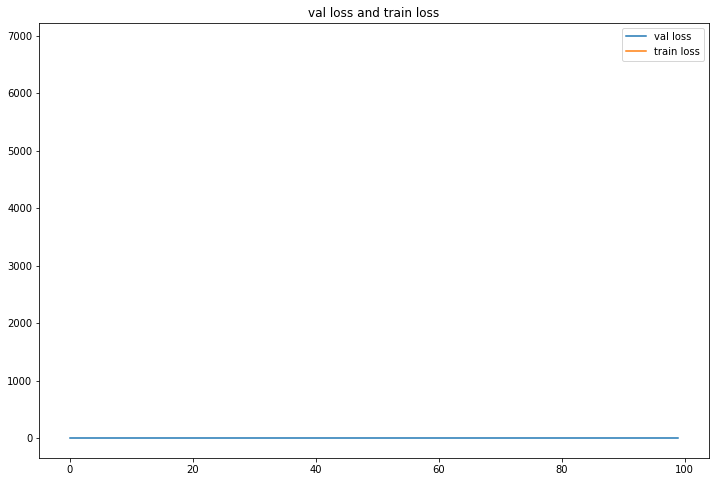

In [55]:
# Train network
W, train_loss, val_loss = train_network(X_train, T_train, X_val, T_val)

# Plot losses
plt.figure(1,figsize=(12,8))
plt.plot(val_loss,label="val loss")
plt.plot(train_loss,label="train loss")
plt.title("val loss and train loss")

plt.legend()
plt.show()

### Exercise 13: Testing (1 point)
Now that the network is trained, we can obtain a test score on a held out test set, and compute a classification performance. Apply your network to the test set, and print its accuracy. 

Note that if you don't avoid looking at another separate test set during training your network you may accidentally overfit on your validation set, e.g. by hyperparameter choices. This is a common problem in machine learning literature.

Also note, by implementing this specific type of architecture for neural networks (i.e., one weight layer, one output, sirgmoid activation function), you have actually implemented logistic regression!

### Solution 13

In [ ]:
# Test network
Y = test_network(X_val, W)

# Print accuracy
plt.figure(1,figsize=(12,8))
plt.plot(val_loss,label="Y")
plt.title("val loss and train loss")

plt.legend()
plt.show()